In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy import stats

In [2]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/train.csv")

# EDA

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

<Axes: >

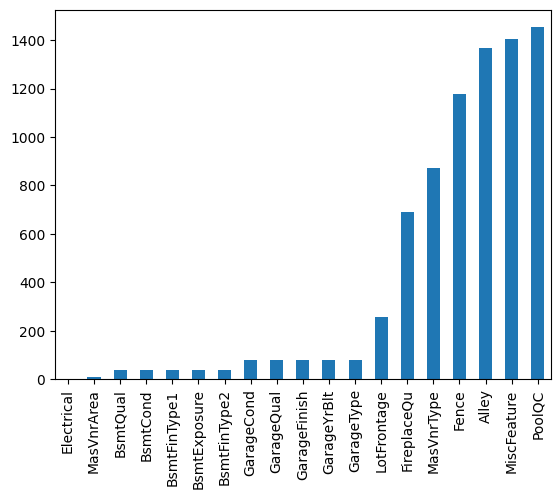

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns]
# Get min, max, and count of unique values for each column
summary = df_numerical_columns.agg({'min', 'max', 'nunique'})

# Rename the 'nunique' aggregation to 'count_unique' for clarity
summary.rename(columns={'nunique': 'count_unique'}, inplace=True)

pd.DataFrame(summary).T

nunique       max      min
Id              1460.0    1460.0      1.0
MSSubClass        15.0     190.0     20.0
LotFrontage      110.0     313.0     21.0
LotArea         1073.0  215245.0   1300.0
OverallQual       10.0      10.0      1.0
OverallCond        9.0       9.0      1.0
YearBuilt        112.0    2010.0   1872.0
YearRemodAdd      61.0    2010.0   1950.0
MasVnrArea       327.0    1600.0      0.0
BsmtFinSF1       637.0    5644.0      0.0
BsmtFinSF2       144.0    1474.0      0.0
BsmtUnfSF        780.0    2336.0      0.0
TotalBsmtSF      721.0    6110.0      0.0
1stFlrSF         753.0    4692.0    334.0
2ndFlrSF         417.0    2065.0      0.0
LowQualFinSF      24.0     572.0      0.0
GrLivArea        861.0    5642.0    334.0
BsmtFullBath       4.0       3.0      0.0
BsmtHalfBath       3.0       2.0      0.0
FullBath           4.0       3.0      0.0
HalfBath           3.0       2.0      0.0
BedroomAbvGr       8.0       8.0      0.0
KitchenAbvGr       4.0       3.0      0.0
TotRmsAbvGrd      12.0      14.0      2.0
Fireplaces         4.0       3.0      0.0
GarageYrBlt       97.0    2010.0   1900.0
GarageCars         5.0       4.0      0.0
GarageArea       441.0    1418.0      0.0
WoodDeckSF       274.0     857.0      0.0
OpenPorchSF      202.0     547.0      0.0
EnclosedPorch    120.0     552.0      0.0
3SsnPorch         20.0     508.0      0.0
ScreenPorch       76.0     480.0      0.0
PoolArea           8.0     738.0      0.0
MiscVal           21.0   15500.0      0.0
MoSold            12.0      12.0      1.0
YrSold             5.0    2010.0   2006.0
SalePrice        663.0  755000.0  34900.0

In [8]:
df = df.drop('Id', axis = 1)
df = df.drop('LotFrontage', axis = 1) # drop it as it has 259 nulls and LotAreascan work instead and after checking the 
# minimum value in LotFrontArea there is no zeros that means all of houses has LotFront

df['MasVnrArea'].fillna(0, inplace = True)
df['BsmtQual'].fillna('No Basement', inplace = True)
df['BsmtCond'].fillna('No Basement', inplace = True)
df['BsmtFinType1'].fillna('No Basement', inplace = True)
df['BsmtExposure'].fillna('No Basement', inplace = True)
df['BsmtFinType2'].fillna('No Basement', inplace = True)

df['GarageCond'].fillna('No Garage', inplace = True)
df['GarageQual'].fillna('No Garage', inplace = True)
df['GarageFinish'].fillna('No Garage', inplace = True)
df['GarageYrBlt'].fillna(0, inplace = True)
df['GarageType'].fillna('No Garage', inplace = True)

#df['LotFrontage'].fillna(0, inplace = True)
df['FireplaceQu'].fillna('No Fireplace', inplace = True)
df['MasVnrType'].fillna('No Masonry veneer', inplace = True)
df['Fence'].fillna('No Fence', inplace = True)
df['Alley'].fillna('No Alley', inplace = True)
df['MiscFeature'].fillna('No Other Categories', inplace = True)
df['PoolQC'].fillna('No Pool', inplace = True)
df = df.dropna() #the other will not affect on the data that much
df['Exterior1st'].fillna('No Exterior1st', inplace = True)
df['Exterior2nd'].fillna('No Exterior2nd', inplace = True)
df['BsmtFinSF1'].fillna(0, inplace = True)
df['BsmtFinSF2'].fillna(0, inplace = True)
df['BsmtUnfSF'].fillna(0, inplace = True)
df['TotalBsmtSF'].fillna(0, inplace = True)
df['KitchenQual'].fillna('No Kitchen', inplace = True)
df['GarageCars'].fillna(0, inplace = True)
df['GarageArea'].fillna(0, inplace = True)
df['SaleType'].fillna('Oth', inplace = True)
df['Utilities'].fillna('No Utilities', inplace = True)
df['BsmtFullBath'].fillna(0, inplace = True)
df['BsmtHalfBath'].fillna(0, inplace = True)
df['Functional'].fillna(df['Functional'].mode()[0], inplace = True)
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
#df = df.dropna() #the other will not affect on the data that much

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemodAdd 

In [10]:
Nominal_columns_in_numeric_columns = ['MSSubClass']
Oridinal_columns_in_numeric_columns= ['OverallQual','OverallCond']
df['MSSubClass'] = df['MSSubClass'].astype(str)

['LotArea', 'YearBuilt', 'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal']


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'EnclosedPorch'),
  Text(1, 0, 'BsmtFinType2'),
  Text(2, 0, 'ExterCond'),
  Text(3, 0, 'BsmtFinSF2'),
  Text(4, 0, 'BsmtCond'),
  Text(5, 0, 'GarageQual'),
  Text(6, 0, 'BsmtExposure'),
  Text(7, 0, 'GarageCond'),
  Text(8, 0, 'PavedDrive'),
  Text(9, 0, 'ScreenPorch'),
  Text(10, 0, 'MasVnrArea'),
  Text(11, 0, 'CentralAir'),
  Text(12, 0, 'BsmtHalfBath'),
  Text(13, 0, 'GarageYrBlt'),
  Text(14, 0, 'OpenPorchSF'),
  Text(15, 0, 'LotArea'),
  Text(16, 0, 'KitchenAbvGr'),
  Text(17, 0, 'TotalBsmtSF'),
  Text(18, 0, 'MiscVal'),
  Text(19, 0, 'BsmtQual'),
  Text(20, 0, 'BedroomAbvGr'),
  Text(21, 0, 'WoodDeckSF'),
  Text(22, 0, 'GrLivArea'),
  Text(23, 0, 'TotRmsAbvGrd'),
  Text(24, 0, 'BsmtUnfSF'),


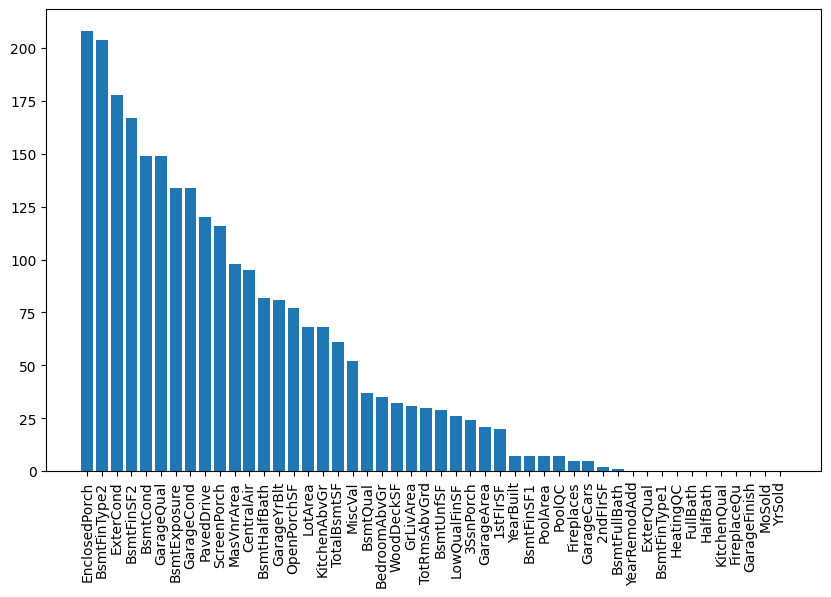

In [100]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR  # Adjust the multiplier as needed
    outliers = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
    return outliers
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns,axis=1)
# Calculate the number of outliers for each column
outliers_count = {}
outliers_columns = []
for column in df_numerical_columns.drop('SalePrice',axis=1).columns:
    if df[column].dtype != 'object':  # Exclude non-numerical columns
        outliers = detect_outliers(df_numerical_columns, column)
        outliers_count[column] = len(outliers)
        if outliers_count[column] > 0:
             outliers_columns.append(column)
        
print(outliers_columns)
# Sort columns by the number of outliers in descending order
sorted_outliers_count = dict(sorted(outliers_count.items(), key=lambda x: x[1], reverse=True))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_outliers_count.keys(), sorted_outliers_count.values())
plt.xticks(rotation=90)

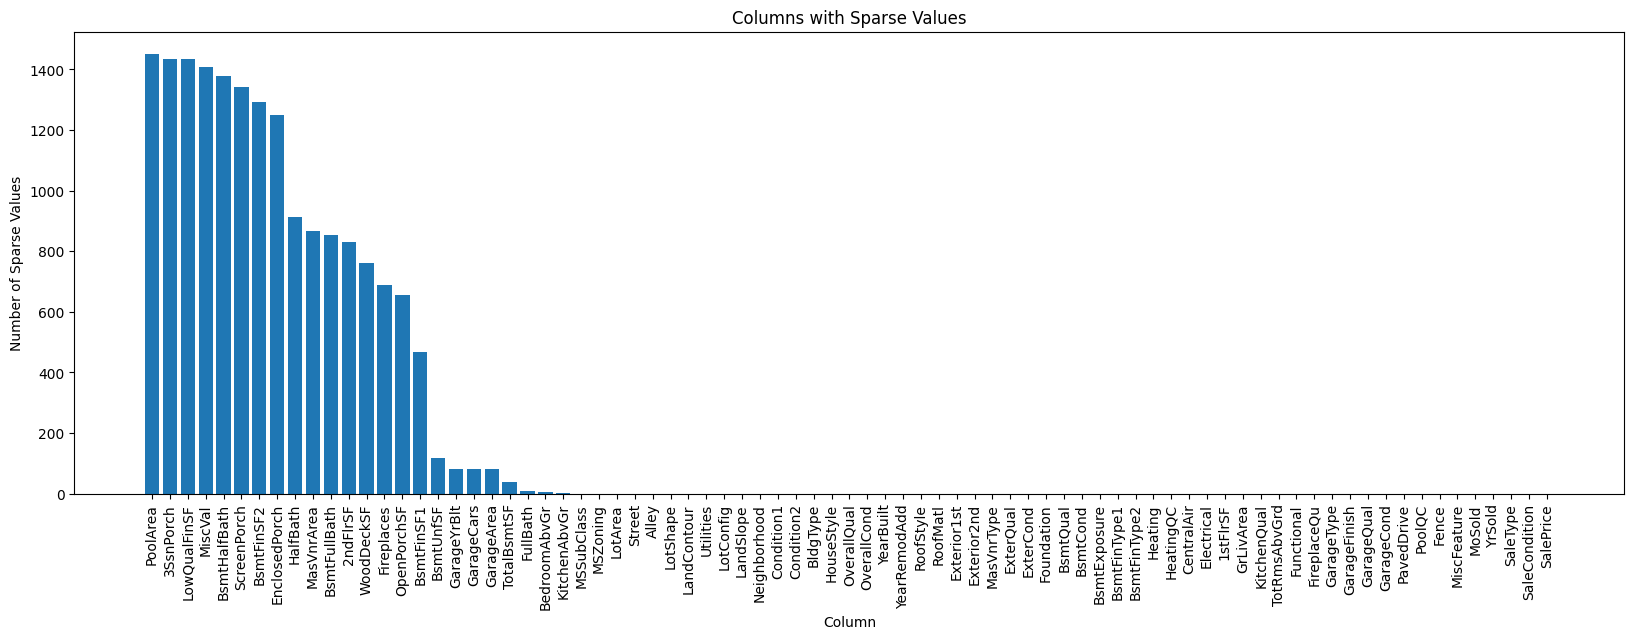

In [12]:
sparse_count = {}
for column in df.columns:
    sparse_count[column] = df[column].eq(0).sum()

# Sort columns by the number of sparse values in descending order
sorted_sparse_count = dict(sorted(sparse_count.items(), key=lambda x: x[1], reverse=True))

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(sorted_sparse_count.keys(), sorted_sparse_count.values())
plt.xticks(rotation=90)
plt.title('Columns with Sparse Values')
plt.xlabel('Column')
plt.ylabel('Number of Sparse Values')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\3074464062.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=(15, 4))


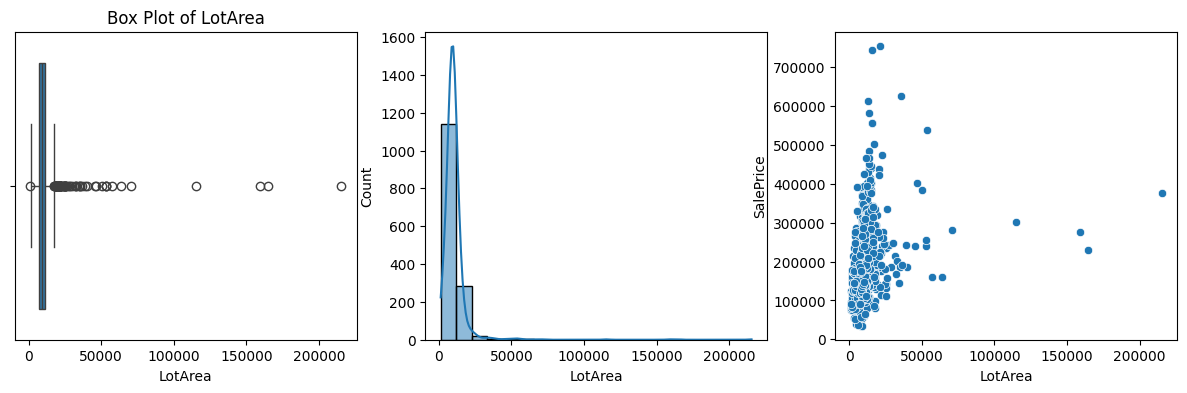

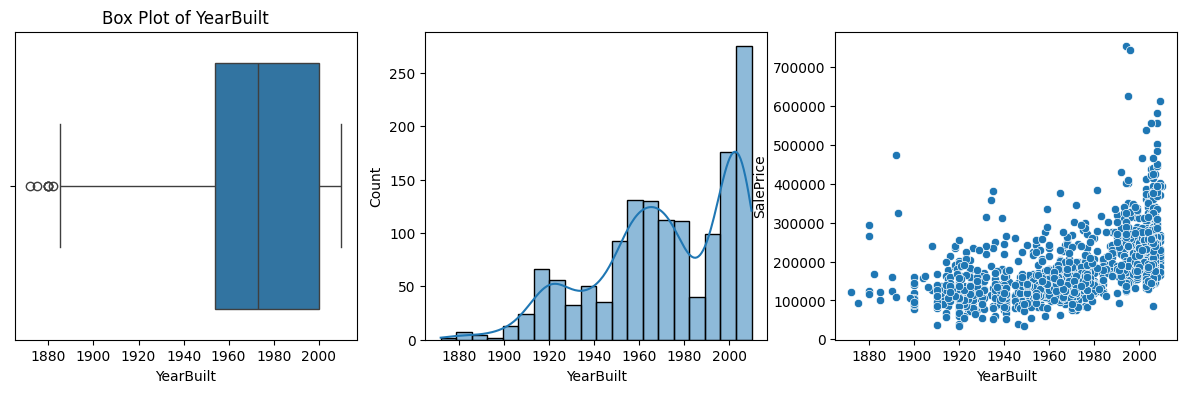

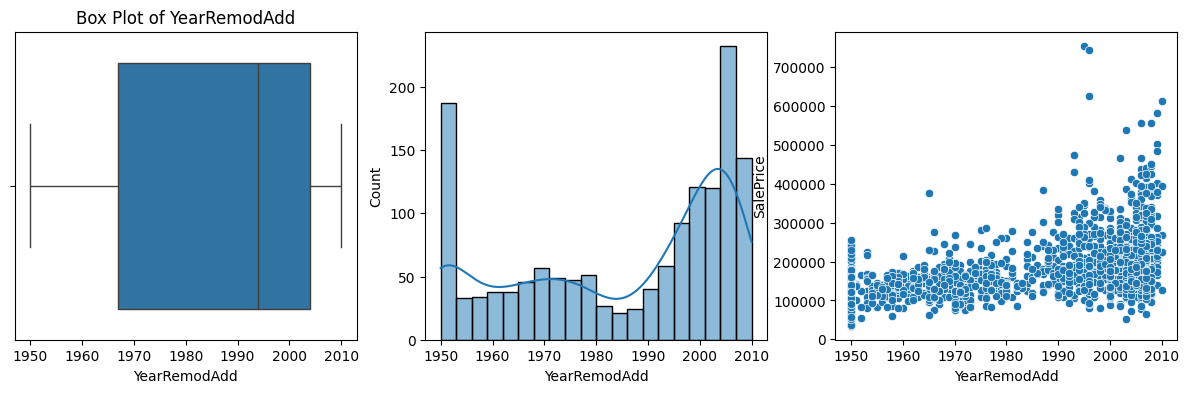

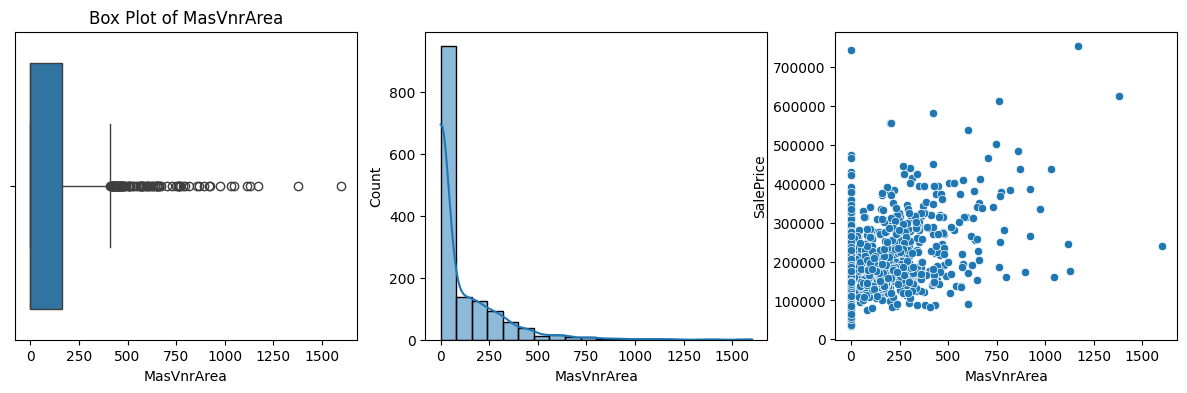

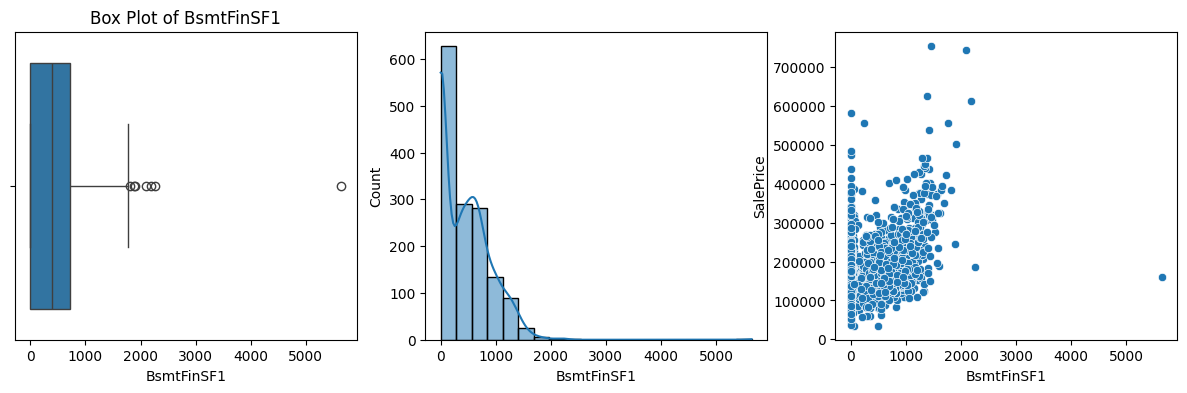

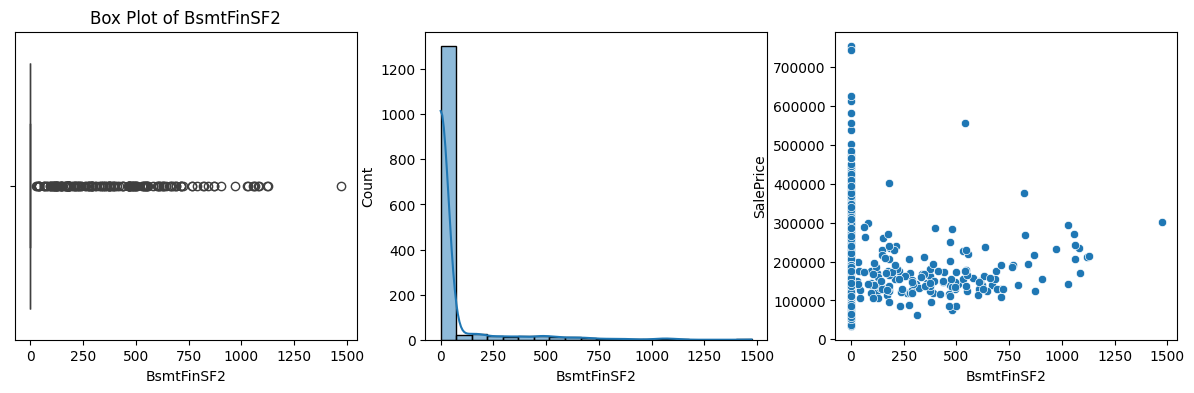

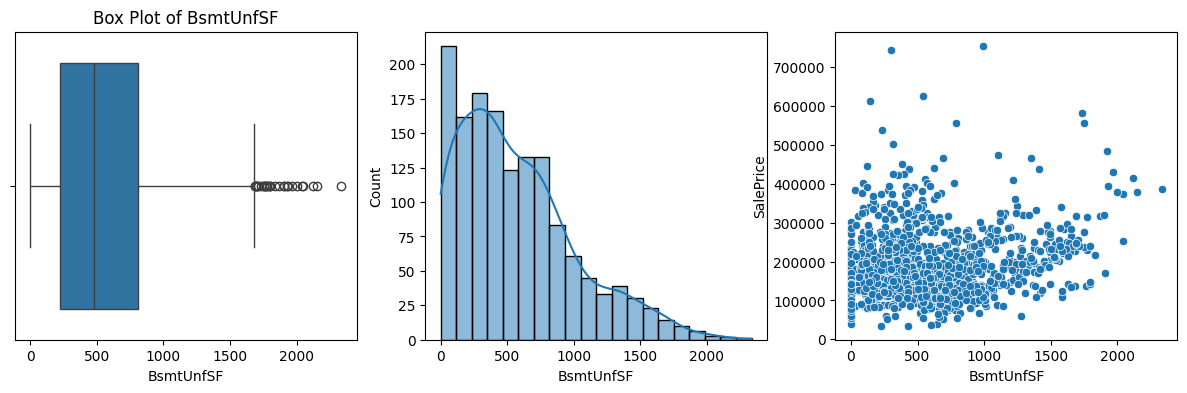

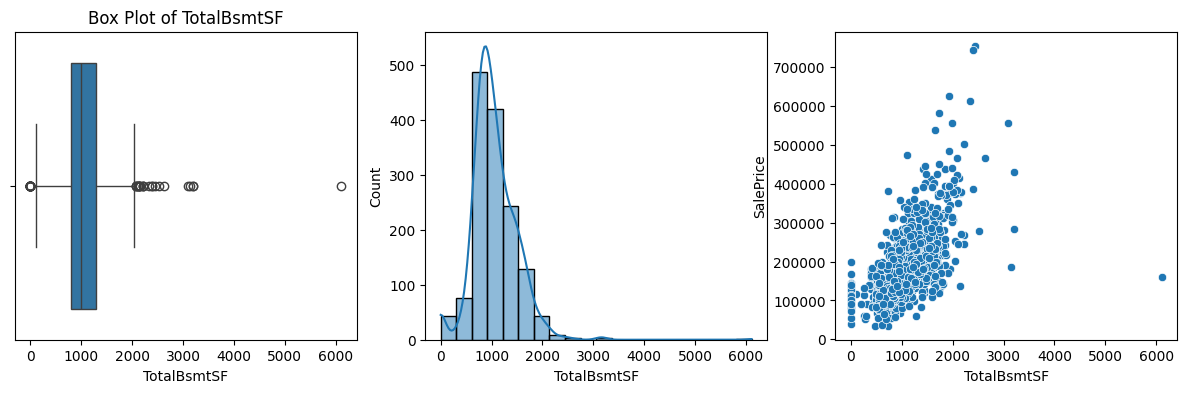

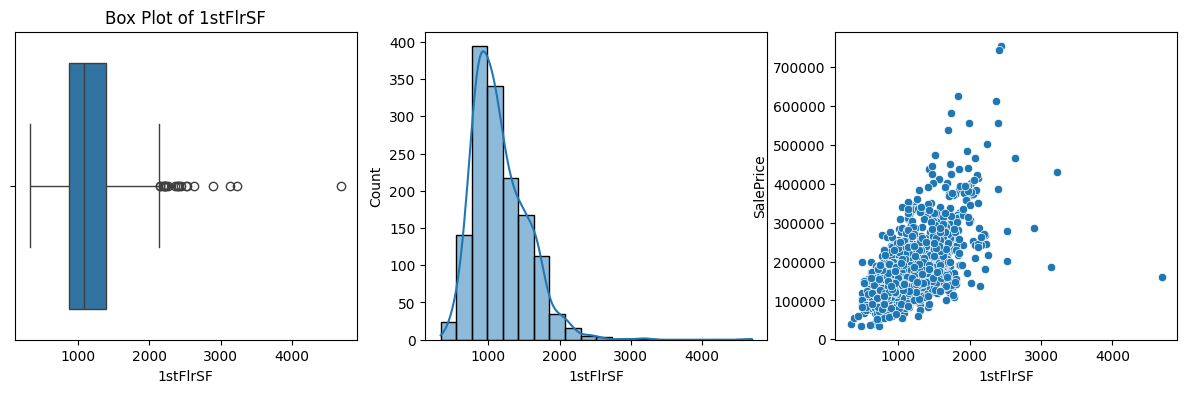

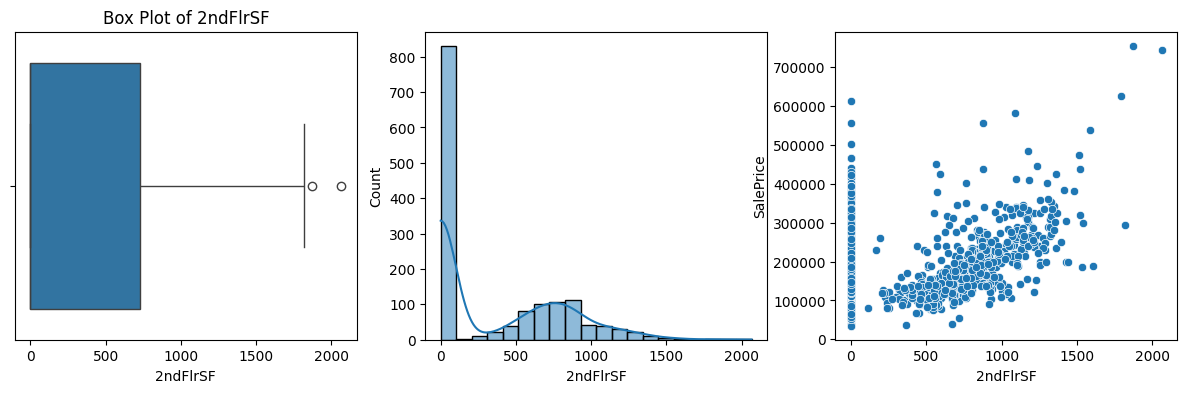

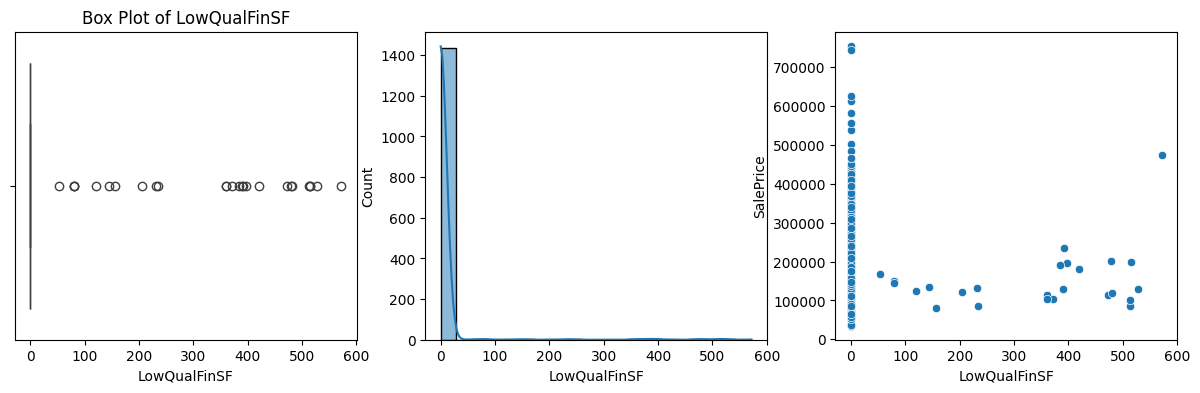

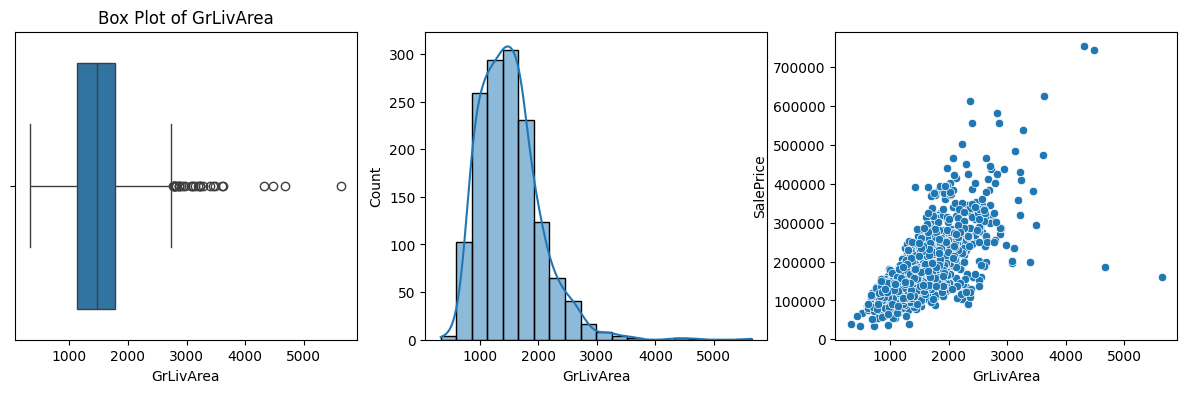

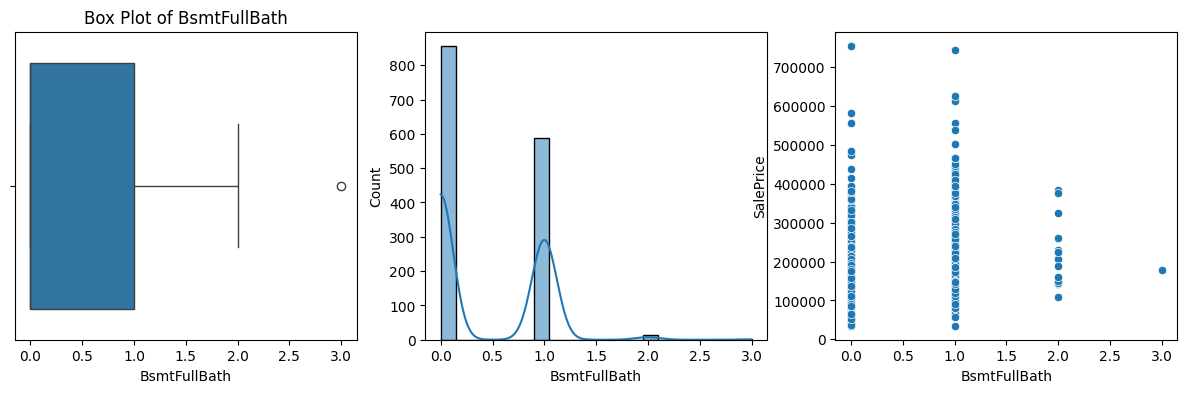

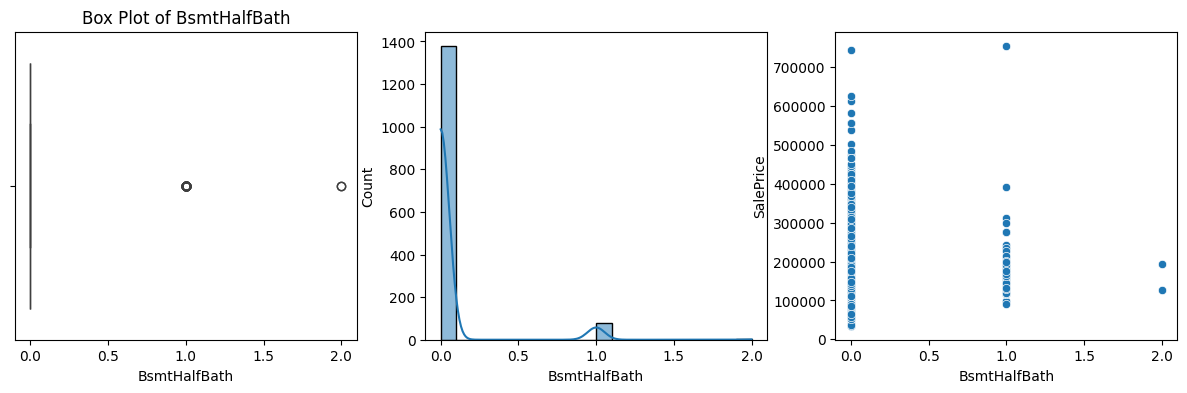

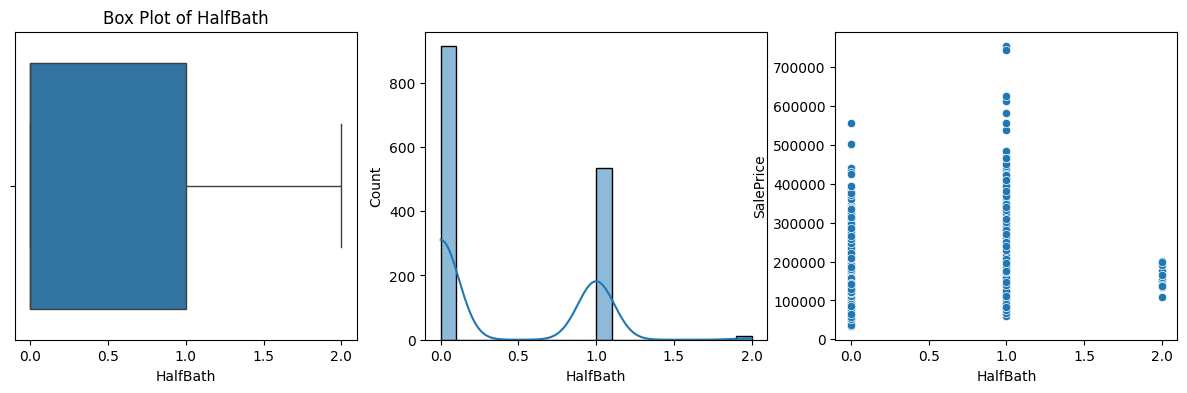

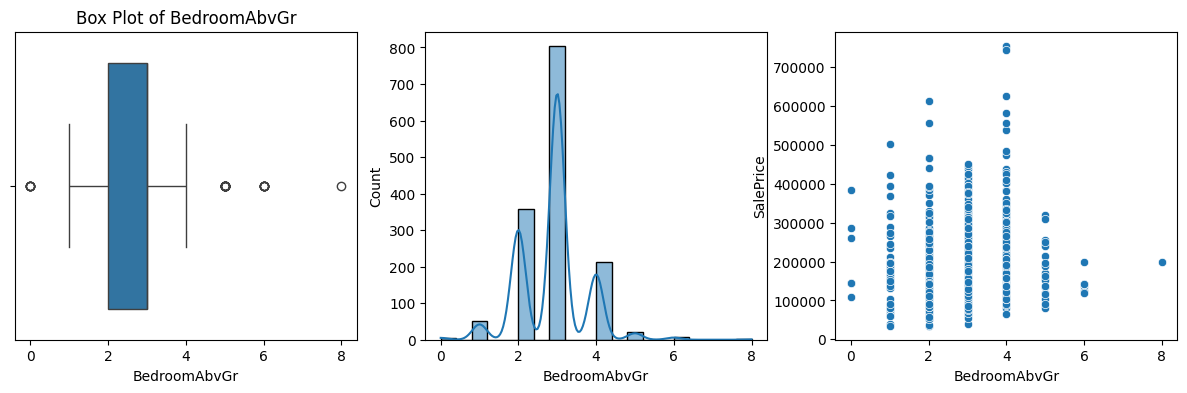

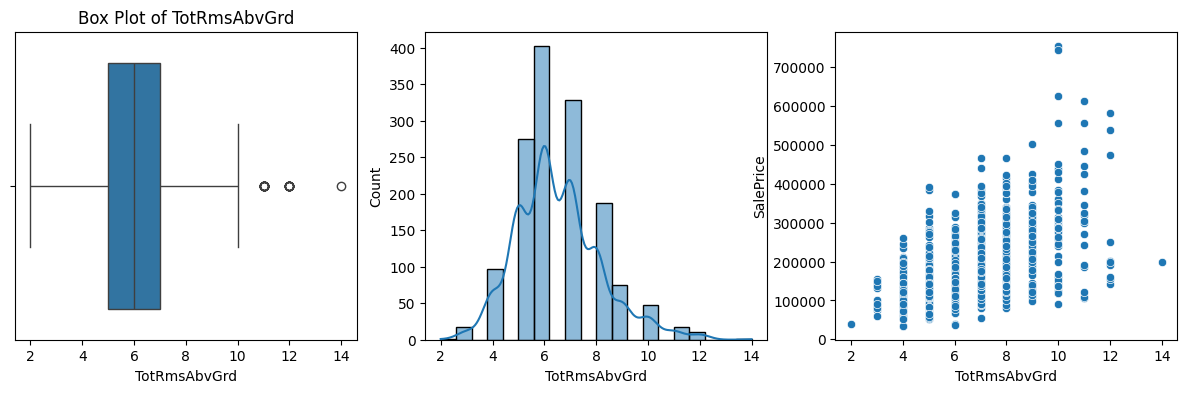

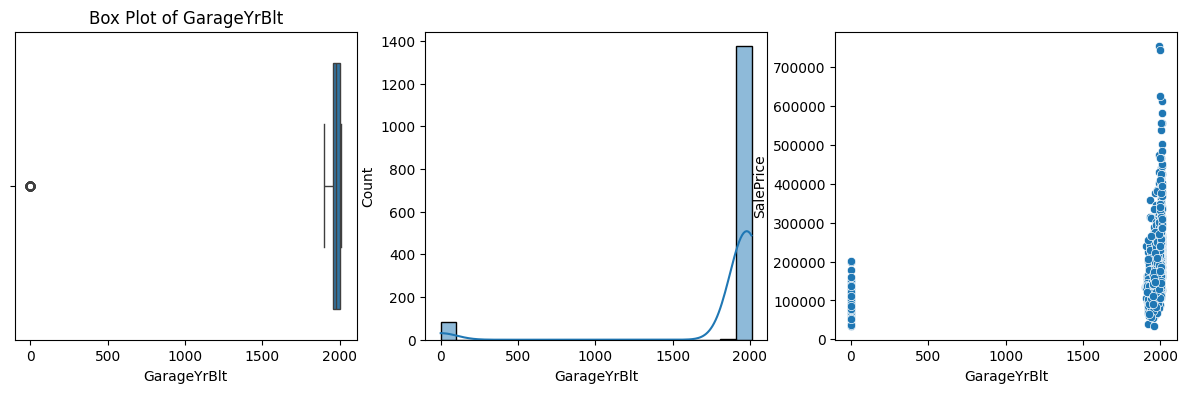

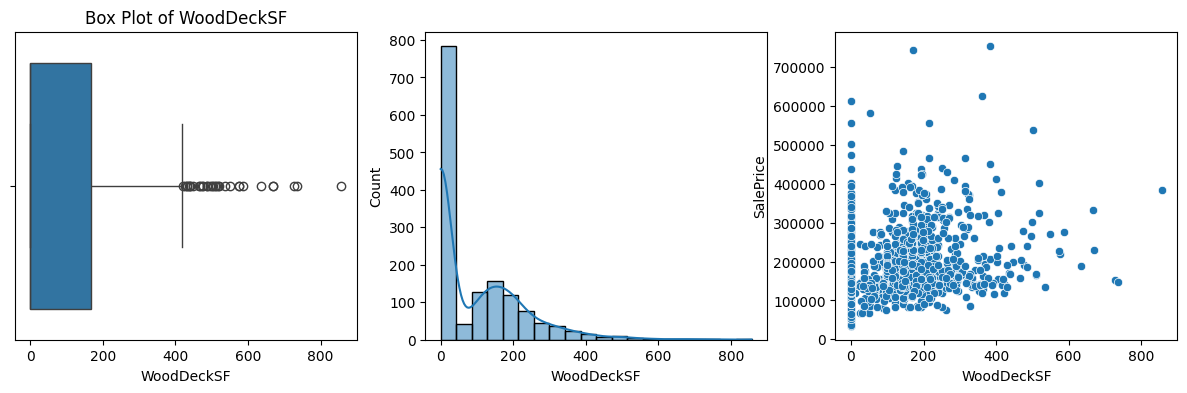

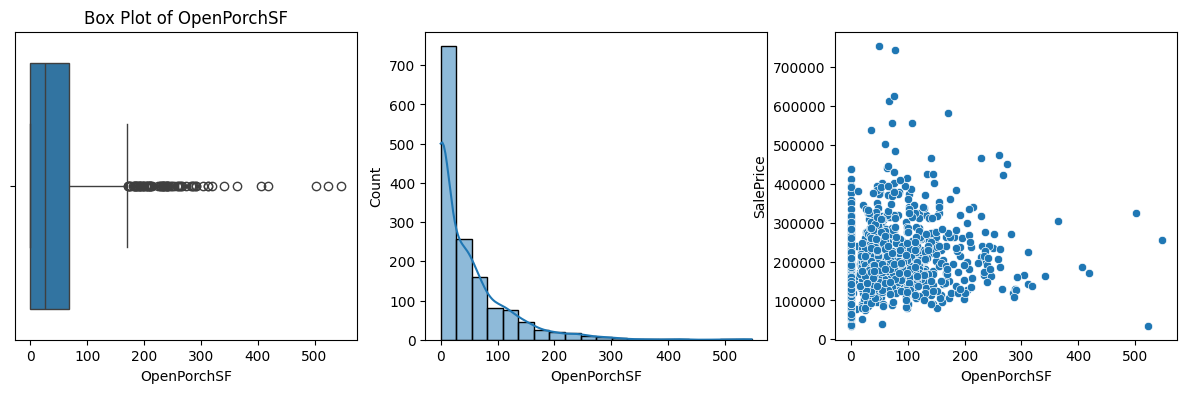

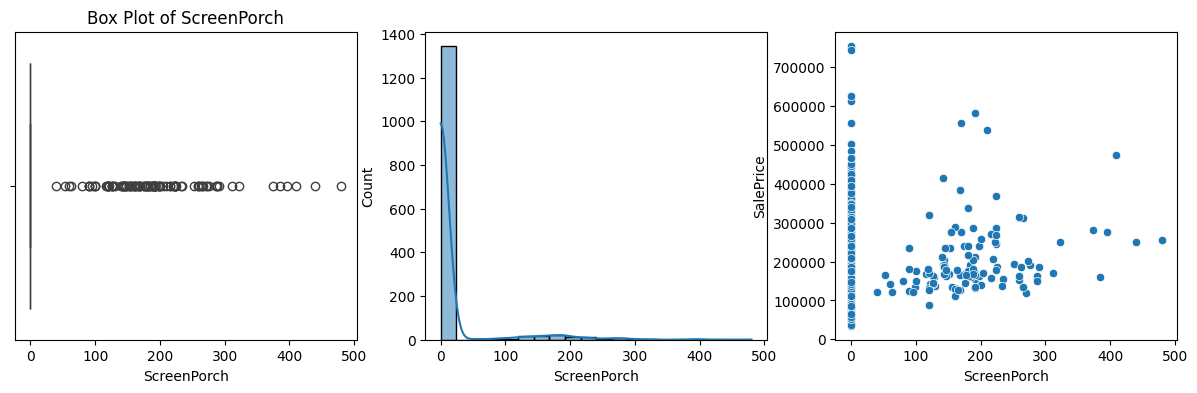

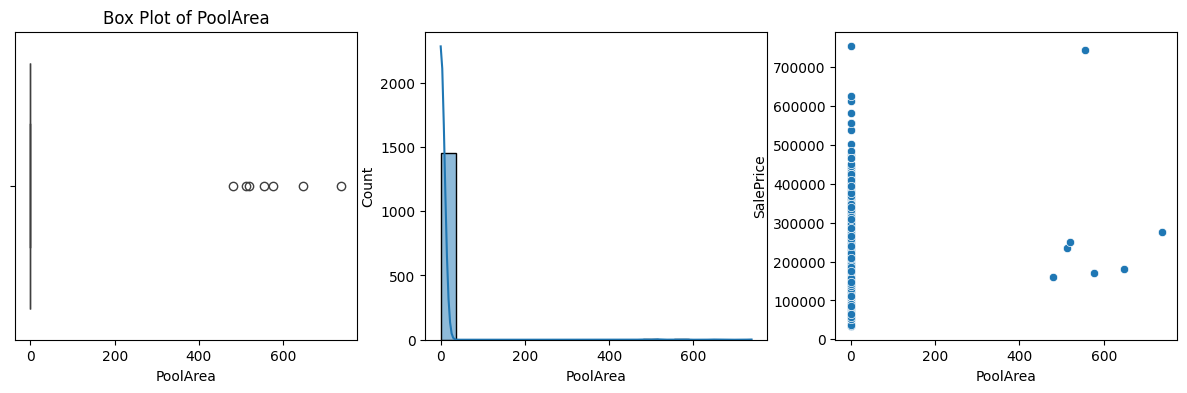

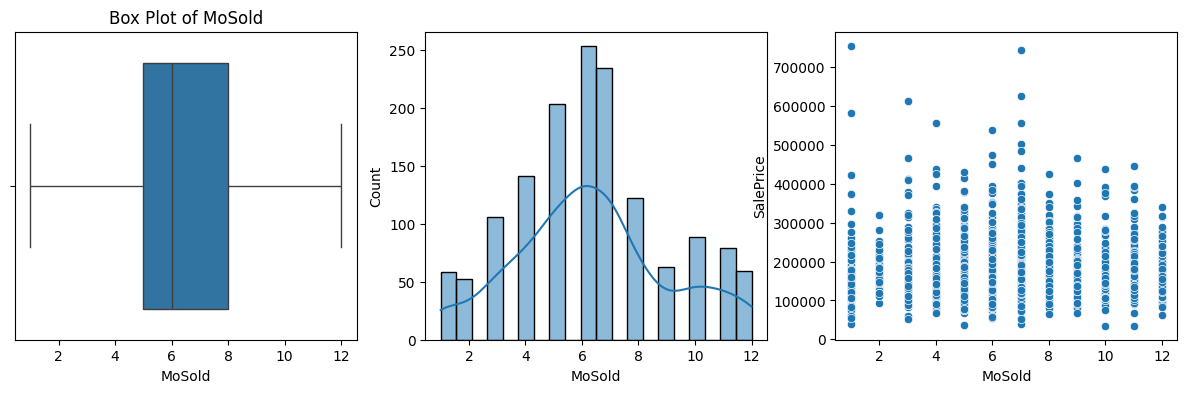

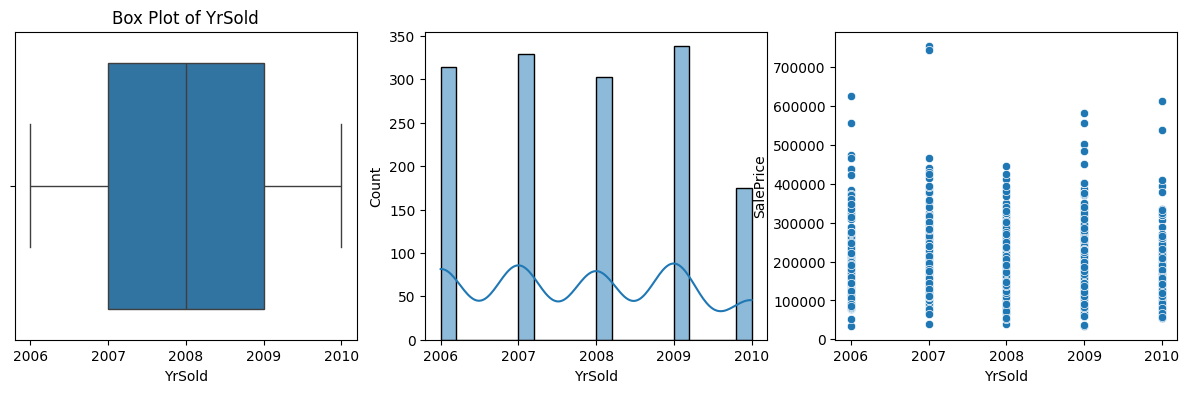

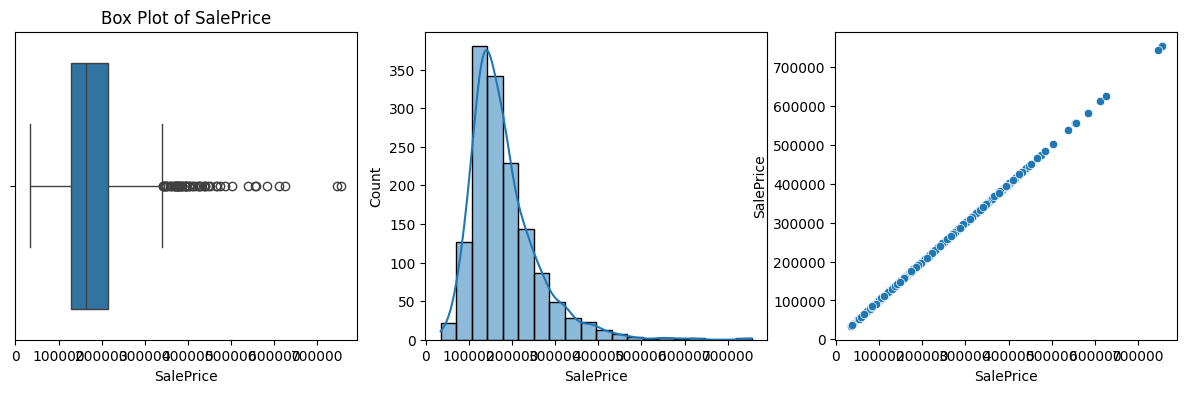

In [13]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns,axis=1)
for column in df_numerical_columns:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Original Data (Before Transformation)
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')
    
    sns.histplot(data=df, x=df[column], bins=20, kde=True, ax = axes[1])
    
    sns.scatterplot(data=df, x=df[column], y=df['SalePrice'], ax = axes[2])



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\3056660698.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\3056660698.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\3056660698.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\3056660698.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\3056660698.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


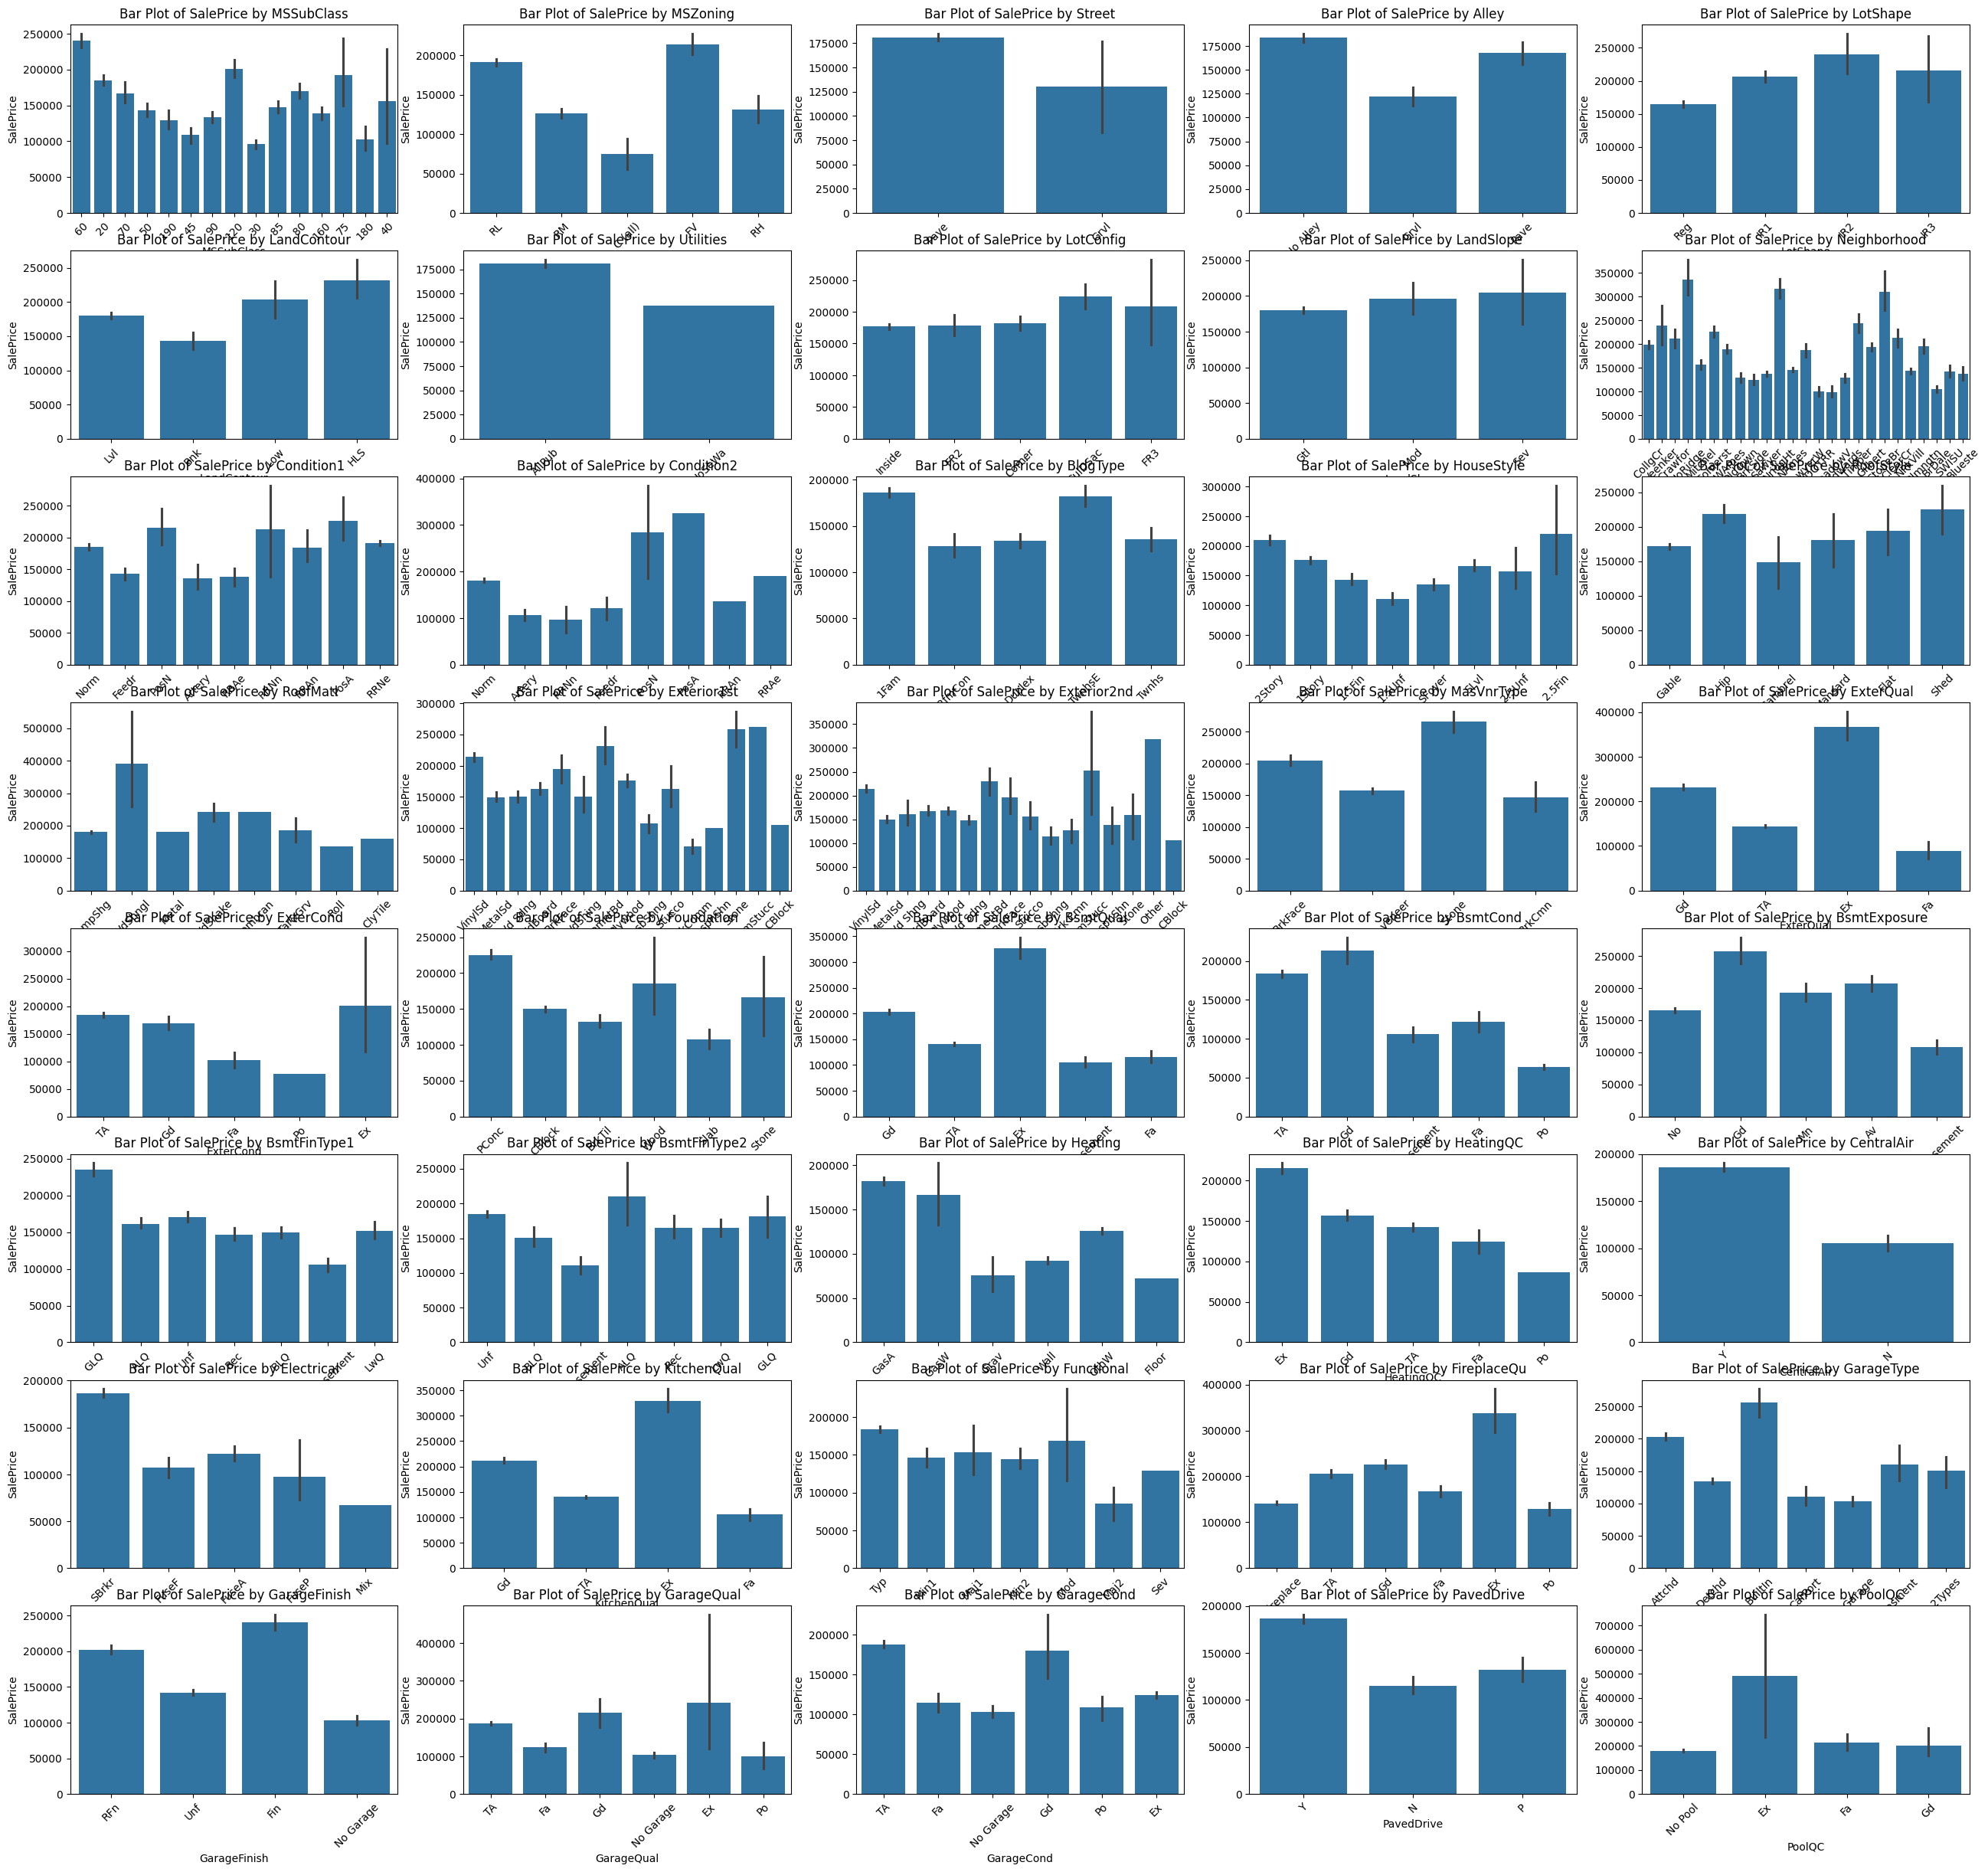

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_categorical_columns = df[categorical_columns]
# Get a list of all categorical columns in your DataFrame
fig, axes = plt.subplots(8, 5, figsize=(32, 30))
num_rows = 8
num_cols = 5
i = 0

for column in categorical_columns:
    if i >= num_rows * num_cols:
        break 
    ax = axes[i // num_cols, i % num_cols]  
    sns.barplot(data=df, x=column, y='SalePrice', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.set_title(f'Bar Plot of SalePrice by {column}')
    i += 1

In [15]:
skewness = df_numerical_columns.skew()

# Filter features with positive skewness to identify right-skewed columns
right_skewed_columns = skewness[skewness > 0].index

print("Right-skewed columns:")
print(right_skewed_columns)

Right-skewed columns:
Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [16]:
scaled_column = []
for column in df_numerical_columns.columns:
    if column in right_skewed_columns:
        continue
    else:
        scaled_column.append(column)
scaled_column

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GarageCars']

In [17]:
scaled_column = ['GarageCars']
scaled_column

['GarageCars']

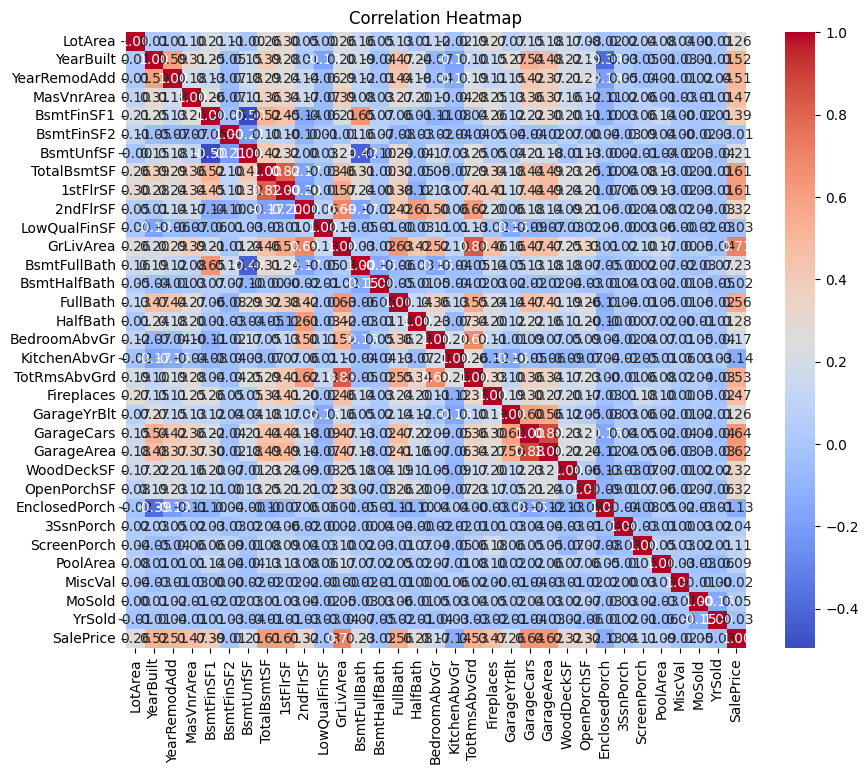

In [18]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns, axis = 1)
correlation_matrix = df_numerical_columns.corr()  # Assuming 'df' contains only numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
correlations = df_numerical_columns.corr()['SalePrice']
# Select features with a correlation above a certain threshold
threshold = 0.3
correlation_selected_features = correlations[abs(correlations) > threshold].index
correlation_selected_features

Index(['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

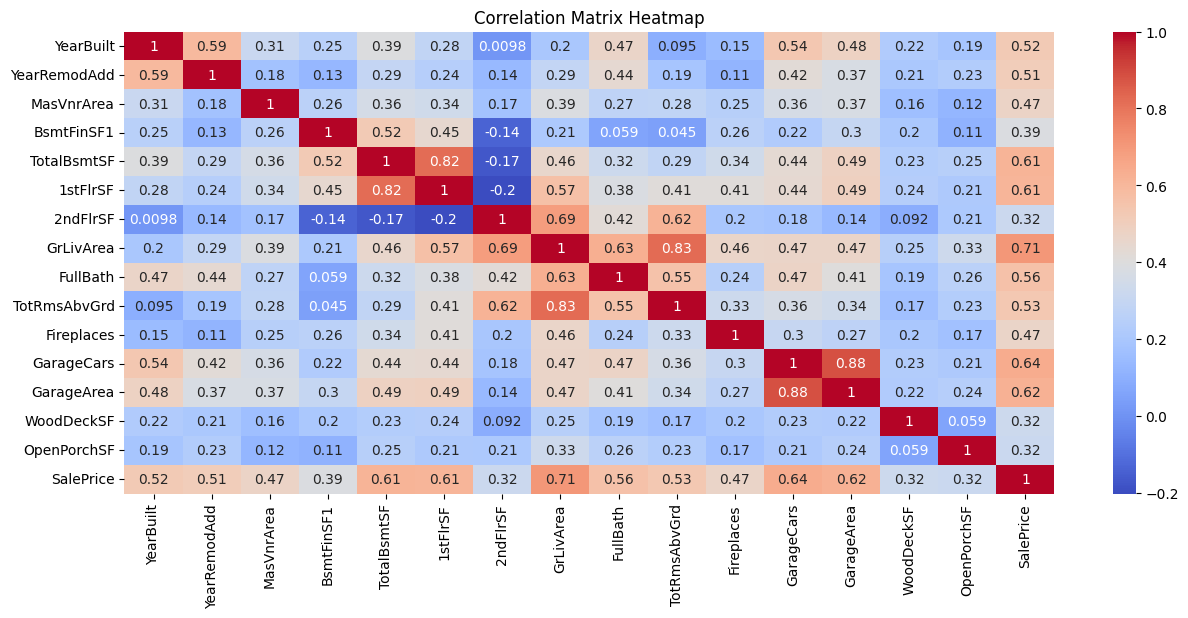

In [20]:
correlations_2 = df[correlation_selected_features].corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlations_2, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [21]:
correlation_selected_features = df[correlation_selected_features].drop(['TotalBsmtSF','TotRmsAbvGrd','GarageArea'] , axis=1)

In [127]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns,axis=1)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = chi2, k=10)
x = df_numerical_columns.drop('SalePrice',axis=1)
y = df['SalePrice']
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_numerical_columns.columns)
#concat two dataframes for better visualization 
featureScoreschi2 = pd.concat([dfcolumns, dfscores],axis=1)
featureScoreschi2.columns = ['Features','Scorechi2']  #naming the dataframe columns
featureScoreschi2 = featureScoreschi2.sort_values(by='Scorechi2', ascending=False)
featureScoreschi2 = featureScoreschi2[:15].set_index(featureScoreschi2.columns[0])
featureScoreschi2

Scorechi2
Features                  
LotArea       1.011442e+07
MiscVal       6.249006e+06
2ndFlrSF      4.649813e+05
BsmtFinSF1    3.994498e+05
PoolArea      3.832987e+05
BsmtFinSF2    3.685835e+05
MasVnrArea    2.878933e+05
BsmtUnfSF     2.747139e+05
LowQualFinSF  2.447074e+05
GrLivArea     1.968564e+05
TotalBsmtSF   1.744388e+05
3SsnPorch     1.548265e+05
ScreenPorch   1.367470e+05
WoodDeckSF    1.300078e+05
1stFlrSF      1.237504e+05

In [141]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
x = df_numerical_columns.drop('SalePrice',axis=1)
y = df['SalePrice']
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_numerical_columns.columns)
#concat two dataframes for better visualization 
featureScoresf_regression_25 = pd.concat([dfcolumns, dfscores],axis=1)
featureScoresf_regression_25.columns = ['Features','Score_f_regression']  #naming the dataframe columns
featureScoresf_regression_25 = featureScoresf_regression_25.sort_values(by='Score_f_regression', ascending=False)
featureScoresf_regression_25 = featureScoresf_regression_25[:25].set_index(featureScoresf_regression_25.columns[0])
featureScoresf_regression_25

Score_f_regression
Features                        
GrLivArea            1469.519195
ExterQual            1271.711282
KitchenQual          1123.379706
GarageCars           1013.352125
GarageArea            926.274007
TotalBsmtSF           881.230814
1stFlrSF              845.454476
BsmtQual              759.418271
FullBath              668.725889
GarageFinish          631.260137
TotRmsAbvGrd          580.533911
YearBuilt             549.374946
FireplaceQu           541.430457
YearRemodAdd          505.251050
MasVnrArea            419.020946
Fireplaces            406.312309
HeatingQC             326.080644
BsmtFinSF1            255.773624
BsmtExposure          237.939514
WoodDeckSF            171.387359
2ndFlrSF              165.597951
OpenPorchSF           161.438418
BsmtFinType1          149.356342
HalfBath              128.217310
GarageQual            118.151324

In [134]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
x = df_numerical_columns.drop('SalePrice',axis=1)
y = df['SalePrice']
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_numerical_columns.columns)
#concat two dataframes for better visualization 
featureScoresf_regression = pd.concat([dfcolumns, dfscores],axis=1)
featureScoresf_regression.columns = ['Features','Score_f_regression']  #naming the dataframe columns
featureScoresf_regression = featureScoresf_regression.sort_values(by='Score_f_regression', ascending=False)
featureScoresf_regression = featureScoresf_regression[:15].set_index(featureScoresf_regression.columns[0])
featureScoresf_regression

Score_f_regression
Features                        
GrLivArea            1469.519195
ExterQual            1271.711282
KitchenQual          1123.379706
GarageCars           1013.352125
GarageArea            926.274007
TotalBsmtSF           881.230814
1stFlrSF              845.454476
BsmtQual              759.418271
FullBath              668.725889
GarageFinish          631.260137
TotRmsAbvGrd          580.533911
YearBuilt             549.374946
FireplaceQu           541.430457
YearRemodAdd          505.251050
MasVnrArea            419.020946

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_categorical_columns = df[categorical_columns]
df_categorical_columns.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\2882045616.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\2882045616.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\2882045616.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\2882045616.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\2882045616.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


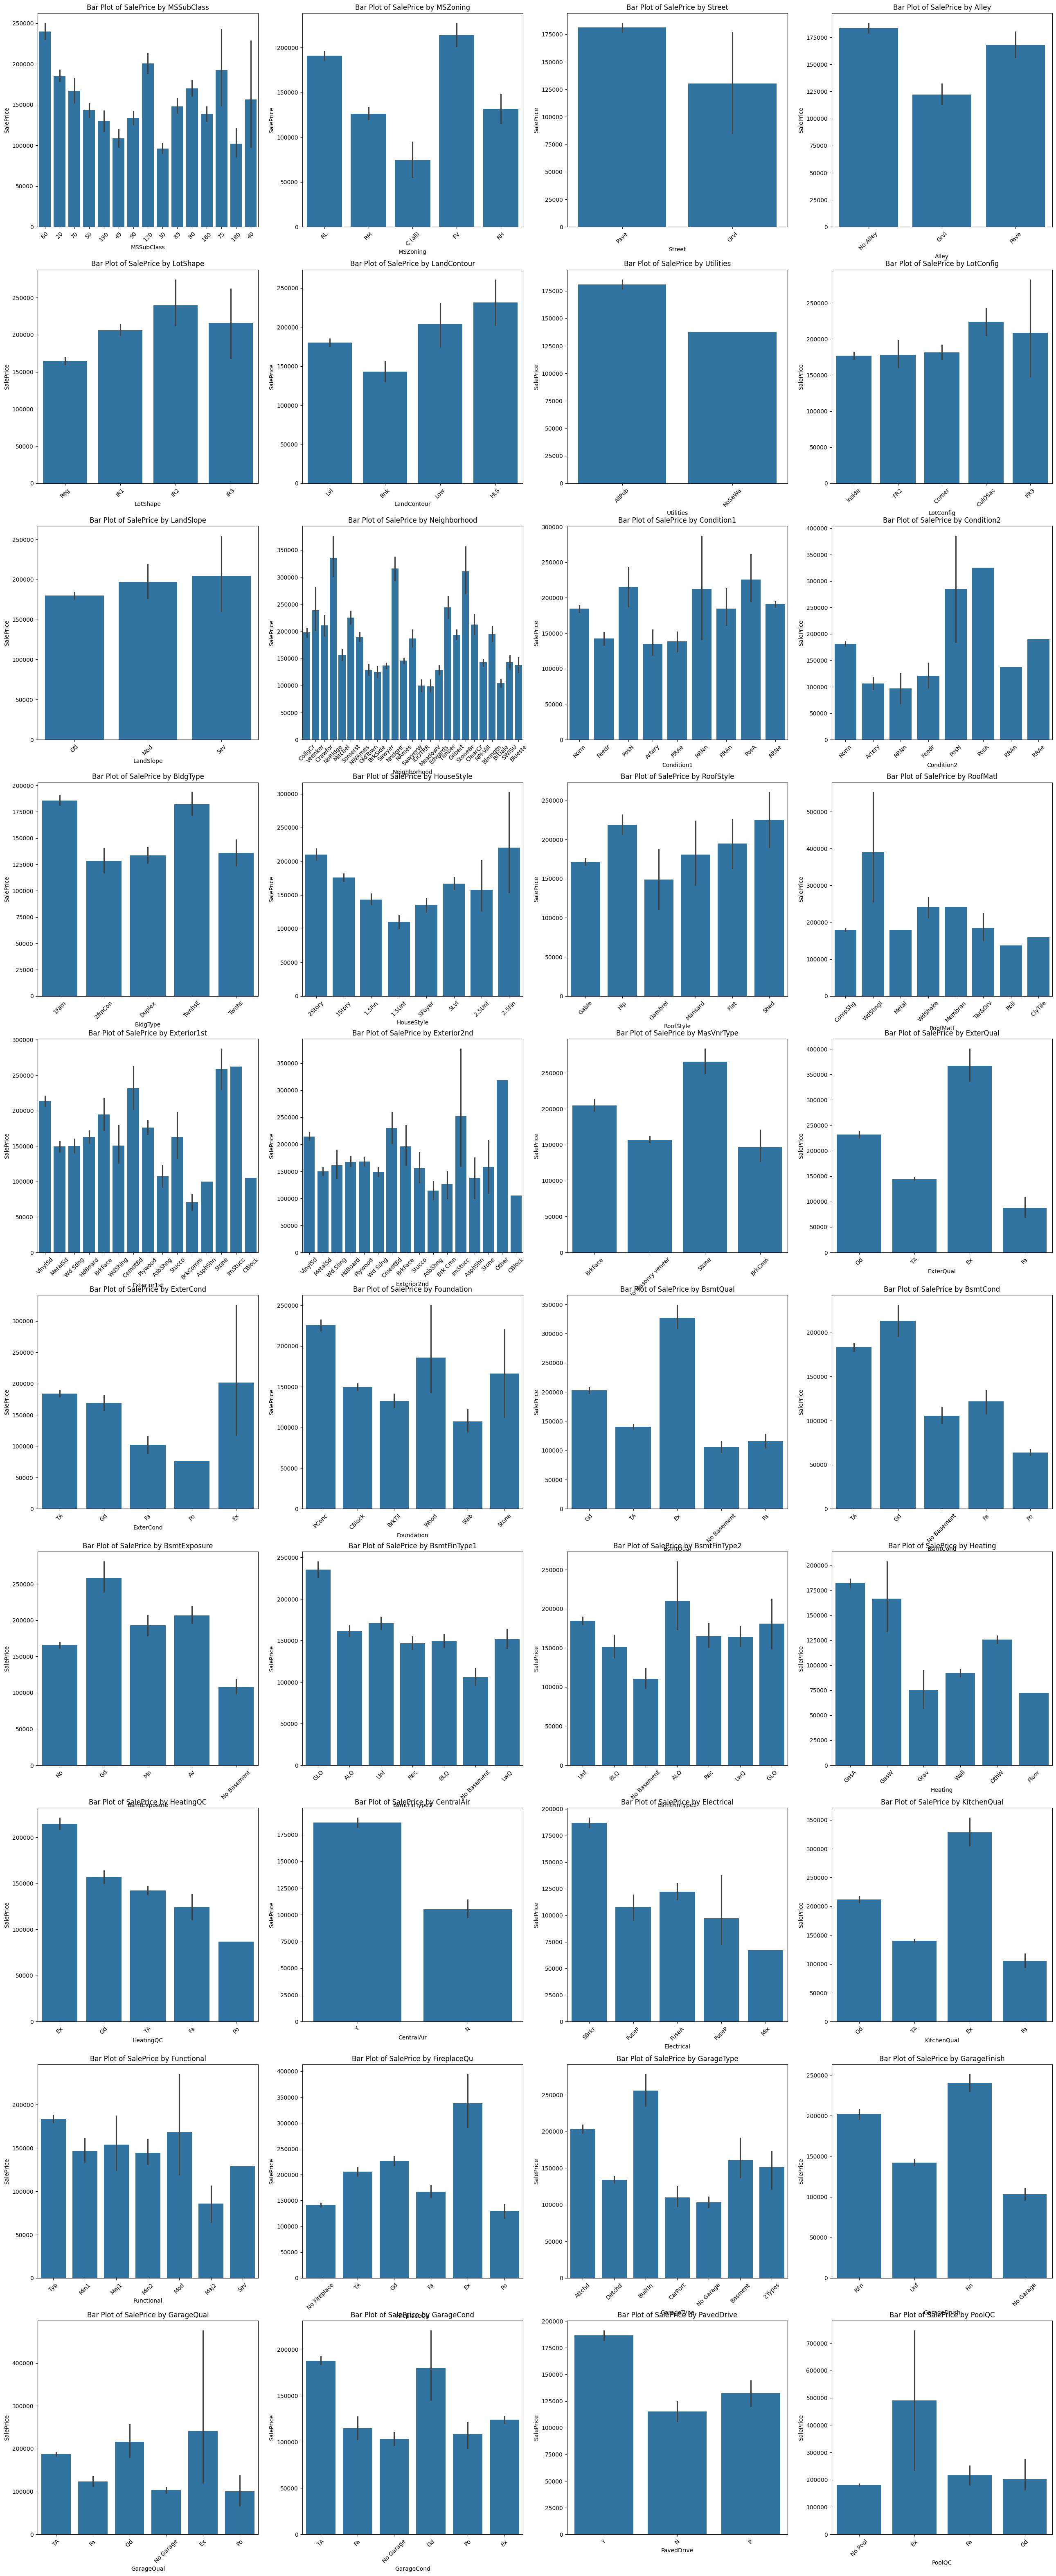

In [25]:
# Get a list of all categorical columns in your DataFrame
fig, axes = plt.subplots(10, 4, figsize=(32, 80))
num_rows = 10
num_cols = 4
i = 0

for column in categorical_columns:
    if i >= num_rows * num_cols:
        break 
    ax = axes[i // num_cols, i % num_cols]  
    sns.barplot(data=df, x=column, y='SalePrice', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.set_title(f'Bar Plot of SalePrice by {column}')
    i += 1

In [26]:
for column in categorical_columns:
    print(column, df[column].unique())

MSSubClass ['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley ['No Alley' 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg'

# Data Preproccesing

In [27]:
Nominal_Features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','Fence','MiscFeature','SaleType','SaleCondition']
Ordinal_featires = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtExposure','BsmtFinType1','BsmtFinType1','HeatingQC','PavedDrive','PoolQC','GarageCond','GarageQual','GarageFinish','FireplaceQu','KitchenQual','CentralAir']

In [28]:
df_dummies = pd.get_dummies(df[Nominal_Features])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 203 entries, MSSubClass_120 to SaleCondition_Partial
dtypes: bool(203)
memory usage: 300.6 KB


In [29]:
removed_values_Nominal_features = []
for column in Nominal_Features:
    for value in df[column].unique():
        value = column+'_'+value
        #df_dummies = df_dummies.drop(value,axis = 1)
        removed_values_Nominal_features.append(value)
        break
removed_values_Nominal_features    

['MSSubClass_60',
 'MSZoning_RL',
 'Street_Pave',
 'Alley_No Alley',
 'LotShape_Reg',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'Neighborhood_CollgCr',
 'Condition1_Norm',
 'Condition2_Norm',
 'BldgType_1Fam',
 'HouseStyle_2Story',
 'RoofStyle_Gable',
 'RoofMatl_CompShg',
 'Exterior1st_VinylSd',
 'Exterior2nd_VinylSd',
 'MasVnrType_BrkFace',
 'Foundation_PConc',
 'Heating_GasA',
 'Electrical_SBrkr',
 'Functional_Typ',
 'GarageType_Attchd',
 'Fence_No Fence',
 'MiscFeature_No Other Categories',
 'SaleType_WD',
 'SaleCondition_Normal']

In [30]:
df['ExterQual'] = df['ExterQual'].map({'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['ExterCond'] = df['ExterCond'].map({'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['BsmtQual'] = df['BsmtQual'].map({'No Basement':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'No Basement':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['HeatingQC'] = df['HeatingQC'].map({'No Heating':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'No Garage':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['GarageQual'] = df['GarageQual'].map({'No Garage':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['FireplaceQu'] = df['FireplaceQu'].map({'No Fireplace':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['PoolQC'] = df['PoolQC'].map({'No Pool':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['KitchenQual'] = df['KitchenQual'].map({'No Kitchen':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'No Basement':0,'No':1,'Mn': 2, 'Av': 3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'No Basement':0,'Unf':1,'LwQ': 2, 'Rec': 3, 'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'No Basement':0,'Unf':1,'LwQ': 2, 'Rec': 3, 'BLQ':4,'ALQ':5,'GLQ':6})
df['PavedDrive'] = df['PavedDrive'].map({'N':0,'P':1,'Y': 2})
df['GarageFinish'] = df['GarageFinish'].map({'No Garage':0,'Unf':1,'RFn': 2,'Fin':3})
df['CentralAir'] = df['CentralAir'].map({'N':0,'Y': 1})

In [31]:
df['FireplaceQu'].unique()

array([0, 3, 4, 2, 5, 1], dtype=int64)

In [32]:
result = pd.concat([df, df_dummies], axis=1)
result = result.drop(removed_values_Nominal_features, axis = 1)
result = result.drop(Nominal_Features, axis = 1)
result.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=226)

## Log for Skewed Data

In [33]:
right_skewed_columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [34]:
for column in right_skewed_columns:
    if column == 'SalePrice':
        continue
    result[column] = np.log(df[column]+1)

In [35]:
#from sklearn.preprocessing import StandardScaler
#scaled = StandardScaler()
#scaled_data=pd.DataFrame()

#for column in scaled_column:
#    scaled_data=pd.DataFrame()
#    scaled_data[[column]] = scaled.fit_transform(df[[column]])
#    result[column] = scaled_data[column]

In [36]:
result.describe().T

count           mean           std           min  \
LotArea        1459.0       9.110917      0.517543      7.170888   
OverallQual    1459.0       6.100069      1.383171      1.000000   
OverallCond    1459.0       5.575737      1.113079      1.000000   
YearBuilt      1459.0    1971.244003     30.199555   1872.000000   
YearRemodAdd   1459.0    1984.850583     20.644343   1950.000000   
MasVnrArea     1459.0       2.121717      2.629074      0.000000   
ExterQual      1459.0       3.396162      0.574384      2.000000   
ExterCond      1459.0       3.083619      0.351167      1.000000   
BsmtQual       1459.0       3.488691      0.876677      0.000000   
BsmtCond       1459.0       2.934887      0.552345      0.000000   
BsmtExposure   1459.0       1.630569      1.067630      0.000000   
BsmtFinType1   1459.0       3.547635      2.107443      0.000000   
BsmtFinSF1     1459.0       4.232630      2.991026      0.000000   
BsmtFinType2   1459.0       1.247430      0.892615      0.000000   
BsmtFinSF2     1459.0       0.655847      1.845597      0.000000   
BsmtUnfSF      1459.0       5.648169      1.854639      0.000000   
TotalBsmtSF    1459.0       6.751106      1.145915      0.000000   
HeatingQC      1459.0       4.145305      0.959822      1.000000   
CentralAir     1459.0       0.934887      0.246810      0.000000   
1stFlrSF       1459.0       7.008714      0.317382      5.814131   
2ndFlrSF       1459.0       2.862120      3.293092      0.000000   
LowQualFinSF   1459.0       0.099882      0.747605      0.000000   
GrLivArea      1459.0       7.268531      0.333416      5.814131   
BsmtFullBath   1459.0       0.291594      0.349875      0.000000   
BsmtHalfBath   1459.0       0.039513      0.162652      0.000000   
FullBath       1459.0       0.917703      0.223307      0.000000   
HalfBath       1459.0       0.262731      0.341800      0.000000   
BedroomAbvGr   1459.0       1.327903      0.229981      0.000000   
KitchenAbvGr   1459.0       0.711686      0.089297      0.000000   
KitchenQual    1459.0       3.511309      0.663864      2.000000   
TotRmsAbvGrd   1459.0       1.994348      0.214307      1.098612   
Fireplaces     1459.0       0.400149      0.394656      0.000000   
FireplaceQu    1459.0       1.826594      1.810866      0.000000   
GarageYrBlt    1459.0    1868.644962    453.838403      0.000000   
GarageFinish   1459.0       1.714873      0.892503      0.000000   
GarageCars     1459.0       1.766964      0.747546      0.000000   
GarageArea     1459.0       5.808028      1.455609      0.000000   
GarageQual     1459.0       2.810144      0.723129      0.000000   
GarageCond     1459.0       2.808773      0.719915      0.000000   
PavedDrive     1459.0       1.856066      0.496748      0.000000   
WoodDeckSF     1459.0       2.455727      2.596710      0.000000   
OpenPorchSF    1459.0       2.310123      2.152276      0.000000   
EnclosedPorch  1459.0       0.698497      1.727812      0.000000   
3SsnPorch      1459.0       0.085737      0.667101      0.000000   
ScreenPorch    1459.0       0.410953      1.403634      0.000000   
PoolArea       1459.0       0.030452      0.438834      0.000000   
PoolQC         1459.0       0.017820      0.269044      0.000000   
MiscVal        1459.0       0.233616      1.226435      0.000000   
MoSold         1459.0       1.910909      0.425674      0.693147   
YrSold         1459.0       7.605300      0.000661      7.604396   
SalePrice      1459.0  180930.394791  79468.964025  34900.000000   

                         25%            50%            75%            max  
LotArea             8.929302       9.156729       9.359105      12.279537  
OverallQual         5.000000       6.000000       7.000000      10.000000  
OverallCond         5.000000       5.000000       6.000000       9.000000  
YearBuilt        1954.000000    1973.000000    2000.000000    2010.000000  
YearRemodAdd     1967.000000    1994.000000    2004.000000    2010.000000  
MasVnrArea          0.0

In [37]:
df.describe().T

count           mean           std      min       25%  \
LotArea        1459.0   10517.363948   9984.666267   1300.0    7549.0   
OverallQual    1459.0       6.100069      1.383171      1.0       5.0   
OverallCond    1459.0       5.575737      1.113079      1.0       5.0   
YearBuilt      1459.0    1971.244003     30.199555   1872.0    1954.0   
YearRemodAdd   1459.0    1984.850583     20.644343   1950.0    1967.0   
MasVnrArea     1459.0     103.187800    180.773158      0.0       0.0   
ExterQual      1459.0       3.396162      0.574384      2.0       3.0   
ExterCond      1459.0       3.083619      0.351167      1.0       3.0   
BsmtQual       1459.0       3.488691      0.876677      0.0       3.0   
BsmtCond       1459.0       2.934887      0.552345      0.0       3.0   
BsmtExposure   1459.0       1.630569      1.067630      0.0       1.0   
BsmtFinType1   1459.0       3.547635      2.107443      0.0       1.0   
BsmtFinSF1     1459.0     443.943797    456.106417      0.0       0.0   
BsmtFinType2   1459.0       1.247430      0.892615      0.0       1.0   
BsmtFinSF2     1459.0      46.581220    161.369977      0.0       0.0   
BsmtUnfSF      1459.0     567.366004    441.992392      0.0     223.0   
TotalBsmtSF    1459.0    1057.891021    438.500975      0.0     796.0   
HeatingQC      1459.0       4.145305      0.959822      1.0       3.0   
CentralAir     1459.0       0.934887      0.246810      0.0       1.0   
1stFlrSF       1459.0    1162.906785    386.572089    334.0     882.0   
2ndFlrSF       1459.0     346.791638    436.610637      0.0       0.0   
LowQualFinSF   1459.0       5.848526     48.639512      0.0       0.0   
GrLivArea      1459.0    1515.546950    525.650927    334.0    1129.0   
BsmtFullBath   1459.0       0.425634      0.518969      0.0       0.0   
BsmtHalfBath   1459.0       0.057574      0.238830      0.0       0.0   
FullBath       1459.0       1.564770      0.550987      0.0       1.0   
HalfBath       1459.0       0.382454      0.502798      0.0       0.0   
BedroomAbvGr   1459.0       2.866347      0.816050      0.0       2.0   
KitchenAbvGr   1459.0       1.046607      0.220410      0.0       1.0   
KitchenQual    1459.0       3.511309      0.663864      2.0       3.0   
TotRmsAbvGrd   1459.0       6.517478      1.625902      2.0       5.0   
Fireplaces     1459.0       0.613434      0.644687      0.0       0.0   
FireplaceQu    1459.0       1.826594      1.810866      0.0       0.0   
GarageYrBlt    1459.0    1868.644962    453.838403      0.0    1958.0   
GarageFinish   1459.0       1.714873      0.892503      0.0       1.0   
GarageCars     1459.0       1.766964      0.747546      0.0       1.0   
GarageArea     1459.0     473.030158    213.869604      0.0     333.0   
GarageQual     1459.0       2.810144      0.723129      0.0       3.0   
GarageCond     1459.0       2.808773      0.719915      0.0       3.0   
PavedDrive     1459.0       1.856066      0.496748      0.0       2.0   
WoodDeckSF     1459.0      94.240576    125.381679      0.0       0.0   
OpenPorchSF    1459.0      46.692255     66.267472      0.0       0.0   
EnclosedPorch  1459.0      21.969157     61.137400      0.0       0.0   
3SsnPorch      1459.0       3.411926     29.327247      0.0       0.0   
ScreenPorch    1459.0      15.071282     55.775138      0.0       0.0   
PoolArea       1459.0       2.760795     40.191018      0.0       0.0   
PoolQC         1459.0       0.017820      0.269044      0.0       0.0   
MiscVal        1459.0      43.518849    496.291826      0.0       0.0   
MoSold         1459.0       6.322824      2.704331      1.0       5.0   
YrSold         1459.0    2007.815627      1.328542   2006.0    2007.0   
SalePrice      1459.0  180930.394791  79468.964025  34900.0  129950.0   

                    50%       75%       max  
LotArea          9477.0   11603.0  215245.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1973.0    2000.0  

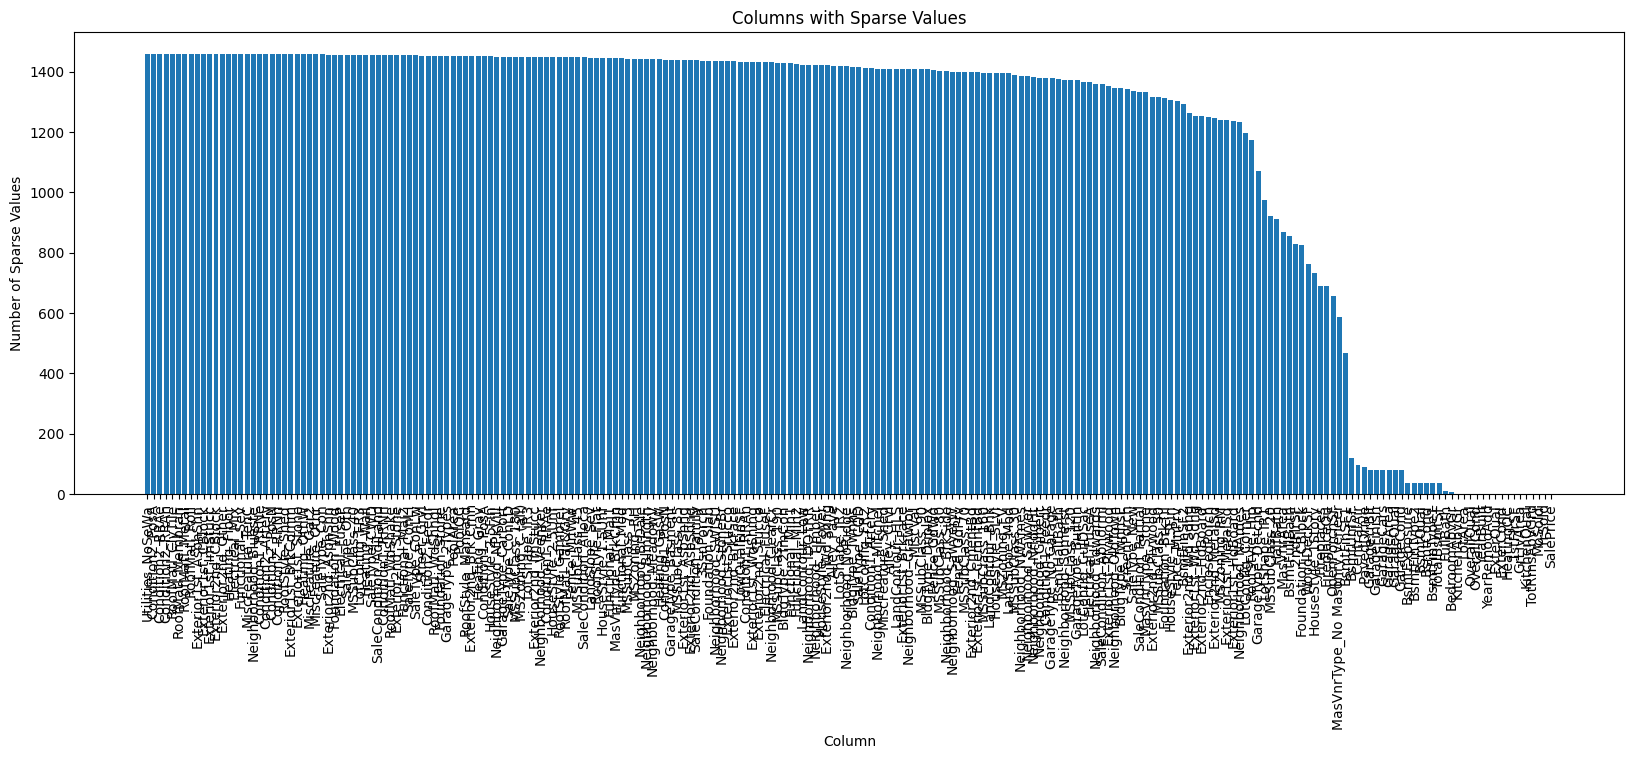

In [38]:
sparse_count = {}
for column in result.columns:
    sparse_count[column] = result[column].eq(0).sum()

# Sort columns by the number of sparse values in descending order
sorted_sparse_count = dict(sorted(sparse_count.items(), key=lambda x: x[1], reverse=True))

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(sorted_sparse_count.keys(), sorted_sparse_count.values())
plt.xticks(rotation=90)
plt.title('Columns with Sparse Values')
plt.xlabel('Column')
plt.ylabel('Number of Sparse Values')
plt.show()

# Preprocessing Test Data

In [76]:
df_test = pd.read_csv("C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [77]:
#df_test = df_test.drop('Id', axis = 1)
df_test = df_test.drop('LotFrontage', axis = 1) # drop it as it has 259 nulls and LotAreascan work instead and after checking the 
# minimum value in LotFrontArea there is no zeros that means all of houses has LotFront
df_test['MasVnrArea'].fillna(0, inplace = True)
df_test['BsmtQual'].fillna('No Basement', inplace = True)
df_test['BsmtCond'].fillna('No Basement', inplace = True)
df_test['BsmtFinType1'].fillna('No Basement', inplace = True)
df_test['BsmtExposure'].fillna('No Basement', inplace = True)
df_test['BsmtFinType2'].fillna('No Basement', inplace = True)
df_test['GarageCond'].fillna('No Garage', inplace = True)
df_test['GarageQual'].fillna('No Garage', inplace = True)
df_test['GarageFinish'].fillna('No Garage', inplace = True)
df_test['GarageYrBlt'].fillna(0, inplace = True)
df_test['GarageType'].fillna('No Garage', inplace = True)
#df['LotFrontage'].fillna(0, inplace = True)
df_test['FireplaceQu'].fillna('No Fireplace', inplace = True)
df_test['MasVnrType'].fillna('No Masonry veneer', inplace = True)
df_test['Fence'].fillna('No Fence', inplace = True)
df_test['Alley'].fillna('No Alley', inplace = True)
df_test['MiscFeature'].fillna('No Other Categories', inplace = True)
df_test['PoolQC'].fillna('No Pool', inplace = True)
df_test['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)
df_test['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace = True)
df_test['BsmtFinSF1'].fillna(0, inplace = True)
df_test['BsmtFinSF2'].fillna(0, inplace = True)
df_test['BsmtUnfSF'].fillna(0, inplace = True)
df_test['TotalBsmtSF'].fillna(0, inplace = True)
df_test['KitchenQual'].fillna('No Kitchen', inplace = True)
df_test['GarageCars'].fillna(0, inplace = True)
df_test['GarageArea'].fillna(0, inplace = True)
df_test['SaleType'].fillna('Oth', inplace = True)
df_test['Utilities'].fillna(df['Utilities'].mode()[0], inplace = True)
df_test['BsmtFullBath'].fillna(0, inplace = True)
df_test['BsmtHalfBath'].fillna(0, inplace = True)
df_test['Functional'].fillna(df['Functional'].mode()[0], inplace = True)
df_test['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
#df = df.dropna() #the other will not affect on the data that much

In [78]:
df_test_dummies = pd.get_dummies(df_test[Nominal_Features])
df_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 173 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(172), int64(1)
memory usage: 256.6 KB


In [79]:
df_test['ExterQual'] = df_test['ExterQual'].map({'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['ExterCond'] = df_test['ExterCond'].map({'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['BsmtQual'] = df_test['BsmtQual'].map({'No Basement':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['BsmtCond'] = df_test['BsmtCond'].map({'No Basement':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['HeatingQC'] = df_test['HeatingQC'].map({'No Heating':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['GarageCond'] = df_test['GarageCond'].map({'No Garage':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['GarageQual'] = df_test['GarageQual'].map({'No Garage':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['FireplaceQu'] = df_test['FireplaceQu'].map({'No Fireplace':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['PoolQC'] = df_test['PoolQC'].map({'No Pool':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['KitchenQual'] = df_test['KitchenQual'].map({'No Kitchen':0,'Po':1,'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5})
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'No Basement':0,'No':1,'Mn': 2, 'Av': 3, 'Gd':4})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'No Basement':0,'Unf':1,'LwQ': 2, 'Rec': 3, 'BLQ':4,'ALQ':5,'GLQ':6})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'No Basement':0,'Unf':1,'LwQ': 2, 'Rec': 3, 'BLQ':4,'ALQ':5,'GLQ':6})
df_test['PavedDrive'] = df_test['PavedDrive'].map({'N':0,'P':1,'Y': 2})
df_test['GarageFinish'] = df_test['GarageFinish'].map({'No Garage':0,'Unf':1,'RFn': 2,'Fin':3})
df_test['CentralAir'] = df_test['CentralAir'].map({'N':0,'Y': 1})

In [80]:
result_test = pd.concat([df_test.drop('Id',axis= 1), df_test_dummies], axis=1)
result_test = result_test.drop(Nominal_Features, axis = 1)
result_test.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)

In [81]:
for column in right_skewed_columns:
    if column == 'SalePrice':
        continue
    result_test[column] = np.log(result_test[column]+1)

In [82]:
for column in df_dummies:
    if column not in result_test.columns:
        result_test[column] = 0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\1781591962.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_test[column] = 0
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\1781591962.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_test[column] = 0
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20804\1781591962.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [83]:
result_test = result_test.drop(removed_values_Nominal_features, axis = 1)
result_test.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other',
       'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC'],
      dtype='object', length=225)

In [84]:
result.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=226)

In [85]:
result_test.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other',
       'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC'],
      dtype='object', length=225)

In [86]:
sum = 0
for i in result_test.columns:
    if i in result.drop('SalePrice',axis=1).columns:
        sum +=1
sum    

225

In [87]:
for  i  in result.columns:
    if i in result_test.columns:
        continue
    else:
        print(i)

SalePrice


In [88]:
result_test.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other',
       'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC'],
      dtype='object', length=225)

In [89]:
result_final_test = result_test[result.drop('SalePrice',axis=1).columns]
result_final_test.columns == result.drop('SalePrice',axis=1).columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Without Feature Selection

## Without removing Outliers

In [90]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [91]:
X = result.drop('SalePrice',axis=1)
y = result['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
model_1 = XGBRegressor()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 25099.40
R-squared (R²): 0.8833714071787042


In [92]:
from sklearn.linear_model import LinearRegression
# Create and train the linear regression model
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_2.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 29372.33
R-squared (R²): 0.8402814870936075


In [93]:
from sklearn.linear_model import Lasso, Ridge
# Create and train Lasso regression model
lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Create and train Ridge regression model
ridge_model = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_y_pred = lasso_model.predict(X_test)
ridge_y_pred = ridge_model.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 29318.90
R-squared (R²): 0.8408621031129219
Root Mean Squared Error (RMSE): 29284.52
R-squared (R²): 0.8412351099067639


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+11, tolerance: 7.630e+08
  model = cd_fast.enet_coordinate_descent(


In [94]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor()
# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

Learning rate set to 0.041954
0:	learn: 78697.9914138	total: 3.24ms	remaining: 3.23s
1:	learn: 76701.8703326	total: 6.38ms	remaining: 3.18s
2:	learn: 74813.1220601	total: 9.05ms	remaining: 3.01s
3:	learn: 72931.2839343	total: 11.8ms	remaining: 2.93s
4:	learn: 70990.7202776	total: 14.7ms	remaining: 2.93s
5:	learn: 69165.2786816	total: 17.9ms	remaining: 2.96s
6:	learn: 67504.6231493	total: 21.4ms	remaining: 3.04s
7:	learn: 65808.5759566	total: 24.8ms	remaining: 3.08s
8:	learn: 64238.9190667	total: 27.6ms	remaining: 3.04s
9:	learn: 62879.8131407	total: 31.4ms	remaining: 3.11s
10:	learn: 61354.8848856	total: 34.3ms	remaining: 3.08s
11:	learn: 60192.9279116	total: 37ms	remaining: 3.05s
12:	learn: 58874.5339830	total: 40.2ms	remaining: 3.05s
13:	learn: 57665.9528997	total: 44.7ms	remaining: 3.15s
14:	learn: 56322.6172903	total: 49ms	remaining: 3.22s
15:	learn: 55178.5218201	total: 51.7ms	remaining: 3.18s
16:	learn: 54069.6938597	total: 54.6ms	remaining: 3.16s
17:	learn: 52970.1537948	total: 

155:	learn: 18793.9738514	total: 492ms	remaining: 2.66s
156:	learn: 18747.5087578	total: 496ms	remaining: 2.66s
157:	learn: 18706.1983148	total: 498ms	remaining: 2.66s
158:	learn: 18674.6118868	total: 502ms	remaining: 2.65s
159:	learn: 18607.5963198	total: 505ms	remaining: 2.65s
160:	learn: 18567.0344493	total: 509ms	remaining: 2.65s
161:	learn: 18558.6025990	total: 512ms	remaining: 2.65s
162:	learn: 18494.0542749	total: 514ms	remaining: 2.64s
163:	learn: 18444.8991878	total: 518ms	remaining: 2.64s
164:	learn: 18386.9635289	total: 520ms	remaining: 2.63s
165:	learn: 18334.3450518	total: 523ms	remaining: 2.63s
166:	learn: 18288.5860822	total: 525ms	remaining: 2.62s
167:	learn: 18204.2631398	total: 528ms	remaining: 2.62s
168:	learn: 18173.1910765	total: 531ms	remaining: 2.61s
169:	learn: 18098.4980025	total: 534ms	remaining: 2.61s
170:	learn: 18047.3198632	total: 537ms	remaining: 2.6s
171:	learn: 18025.0094717	total: 540ms	remaining: 2.6s
172:	learn: 17951.6420524	total: 543ms	remaining: 

321:	learn: 13520.1853226	total: 994ms	remaining: 2.09s
322:	learn: 13516.3586363	total: 997ms	remaining: 2.09s
323:	learn: 13488.8875554	total: 1s	remaining: 2.09s
324:	learn: 13473.5502820	total: 1s	remaining: 2.08s
325:	learn: 13455.1119836	total: 1.02s	remaining: 2.1s
326:	learn: 13430.1015935	total: 1.02s	remaining: 2.1s
327:	learn: 13409.8385494	total: 1.03s	remaining: 2.1s
328:	learn: 13392.4403519	total: 1.03s	remaining: 2.1s
329:	learn: 13387.2364004	total: 1.03s	remaining: 2.1s
330:	learn: 13363.3360690	total: 1.03s	remaining: 2.09s
331:	learn: 13335.0838807	total: 1.04s	remaining: 2.09s
332:	learn: 13314.4234936	total: 1.04s	remaining: 2.09s
333:	learn: 13310.6780242	total: 1.04s	remaining: 2.08s
334:	learn: 13284.8965359	total: 1.05s	remaining: 2.08s
335:	learn: 13268.1336825	total: 1.05s	remaining: 2.08s
336:	learn: 13246.5678413	total: 1.05s	remaining: 2.07s
337:	learn: 13225.8541215	total: 1.06s	remaining: 2.07s
338:	learn: 13199.9530588	total: 1.06s	remaining: 2.07s
339

485:	learn: 10637.0906799	total: 1.49s	remaining: 1.57s
486:	learn: 10619.4557250	total: 1.49s	remaining: 1.57s
487:	learn: 10603.1269286	total: 1.5s	remaining: 1.57s
488:	learn: 10580.5224127	total: 1.5s	remaining: 1.57s
489:	learn: 10562.6273519	total: 1.5s	remaining: 1.56s
490:	learn: 10541.3568606	total: 1.5s	remaining: 1.56s
491:	learn: 10526.6751662	total: 1.51s	remaining: 1.56s
492:	learn: 10515.3776044	total: 1.51s	remaining: 1.55s
493:	learn: 10500.0040466	total: 1.51s	remaining: 1.55s
494:	learn: 10484.4823857	total: 1.51s	remaining: 1.54s
495:	learn: 10471.2073005	total: 1.52s	remaining: 1.54s
496:	learn: 10458.8541124	total: 1.52s	remaining: 1.54s
497:	learn: 10444.8581429	total: 1.52s	remaining: 1.53s
498:	learn: 10442.1675456	total: 1.52s	remaining: 1.53s
499:	learn: 10430.8708319	total: 1.53s	remaining: 1.53s
500:	learn: 10411.8421078	total: 1.53s	remaining: 1.52s
501:	learn: 10406.7595312	total: 1.53s	remaining: 1.52s
502:	learn: 10382.7505235	total: 1.53s	remaining: 1.

651:	learn: 8653.0410915	total: 1.91s	remaining: 1.02s
652:	learn: 8641.7929924	total: 1.91s	remaining: 1.01s
653:	learn: 8632.5012048	total: 1.91s	remaining: 1.01s
654:	learn: 8612.4712417	total: 1.92s	remaining: 1.01s
655:	learn: 8601.1606759	total: 1.92s	remaining: 1.01s
656:	learn: 8583.9260293	total: 1.92s	remaining: 1s
657:	learn: 8571.0266860	total: 1.92s	remaining: 1s
658:	learn: 8562.7479870	total: 1.93s	remaining: 997ms
659:	learn: 8552.1344937	total: 1.93s	remaining: 994ms
660:	learn: 8544.9556938	total: 1.93s	remaining: 991ms
661:	learn: 8532.7720248	total: 1.93s	remaining: 988ms
662:	learn: 8518.5282189	total: 1.94s	remaining: 984ms
663:	learn: 8507.5984731	total: 1.94s	remaining: 981ms
664:	learn: 8502.5986243	total: 1.94s	remaining: 978ms
665:	learn: 8495.8925673	total: 1.94s	remaining: 975ms
666:	learn: 8485.0127570	total: 1.95s	remaining: 971ms
667:	learn: 8475.8332998	total: 1.95s	remaining: 968ms
668:	learn: 8460.3925491	total: 1.95s	remaining: 965ms
669:	learn: 8458

821:	learn: 7138.2106189	total: 2.32s	remaining: 502ms
822:	learn: 7137.3291118	total: 2.32s	remaining: 500ms
823:	learn: 7131.8096427	total: 2.33s	remaining: 497ms
824:	learn: 7120.0508320	total: 2.33s	remaining: 494ms
825:	learn: 7115.0371489	total: 2.33s	remaining: 491ms
826:	learn: 7100.4064829	total: 2.33s	remaining: 488ms
827:	learn: 7095.7003400	total: 2.34s	remaining: 485ms
828:	learn: 7081.3708512	total: 2.34s	remaining: 483ms
829:	learn: 7071.4257793	total: 2.34s	remaining: 480ms
830:	learn: 7067.2854372	total: 2.34s	remaining: 477ms
831:	learn: 7059.5958083	total: 2.35s	remaining: 474ms
832:	learn: 7048.0476683	total: 2.35s	remaining: 471ms
833:	learn: 7038.7824288	total: 2.35s	remaining: 468ms
834:	learn: 7030.4969382	total: 2.35s	remaining: 465ms
835:	learn: 7026.8031294	total: 2.36s	remaining: 462ms
836:	learn: 7020.5405828	total: 2.36s	remaining: 459ms
837:	learn: 7010.8644365	total: 2.36s	remaining: 456ms
838:	learn: 6999.5103801	total: 2.36s	remaining: 454ms
839:	learn

986:	learn: 6044.2021903	total: 2.73s	remaining: 35.9ms
987:	learn: 6039.1094229	total: 2.73s	remaining: 33.2ms
988:	learn: 6031.6160125	total: 2.73s	remaining: 30.4ms
989:	learn: 6025.4050912	total: 2.74s	remaining: 27.7ms
990:	learn: 6022.5019914	total: 2.74s	remaining: 24.9ms
991:	learn: 6014.2491790	total: 2.74s	remaining: 22.1ms
992:	learn: 6006.4107273	total: 2.75s	remaining: 19.4ms
993:	learn: 6000.5222733	total: 2.75s	remaining: 16.6ms
994:	learn: 5995.0605439	total: 2.75s	remaining: 13.8ms
995:	learn: 5987.8344457	total: 2.75s	remaining: 11.1ms
996:	learn: 5983.7138348	total: 2.75s	remaining: 8.29ms
997:	learn: 5976.2190996	total: 2.76s	remaining: 5.53ms
998:	learn: 5966.5286177	total: 2.76s	remaining: 2.76ms
999:	learn: 5958.4354489	total: 2.76s	remaining: 0us
Root Mean Squared Error (RMSE): 20267.60
R-squared (R²): 0.9239528128733545


In [95]:
from sklearn.tree import DecisionTreeRegressor
# Initialize DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 38832.20
R-squared (R²): 0.7208341612616742


In [96]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 24345.96
R-squared (R²): 0.7208341612616742


# Test Without feature Selection

In [97]:
y_submission = catboost_model.predict(result_final_test)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_Without_feature_Selection.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  121035.274030
1  1462  163617.060530
2  1463  187604.429440
3  1464  189232.049292
4  1465  185371.832772

# Without Feature Selection and remove outliers

In [103]:
result_2 = result.drop(outliers_columns,axis=1) 
result_final_test_remove_outliers = result_final_test.drop(outliers_columns,axis=1) 

In [110]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#___________________________________________________________________________________________________________________
X = result_2.drop('SalePrice',axis=1)
y = result_2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_2 = XGBRegressor()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('XGBOOST REGRESSION')
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train the linear regression model
model_LR_2 = LinearRegression()
model_LR_2.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_LR_2.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('_______________________________________________________')
print("LINEAR REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train Lasso regression model
lasso_model_2 = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model_2.fit(X_train, y_train)
# Create and train Ridge regression model
ridge_model_2 = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model_2.fit(X_train, y_train)
# Make predictions on the test data
lasso_y_pred = lasso_model_2.predict(X_test)
ridge_y_pred = ridge_model_2.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print('_______________________________________________________')
print("LASSO REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print('_______________________________________________________')
print("RIDGE REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
catboost_model_2 = CatBoostRegressor()
# Train the model
catboost_model_2.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model_2.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print('_______________________________________________________')
print("CATBOOST REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Initialize DecisionTreeRegressor
decision_tree_model_2 = DecisionTreeRegressor()

# Train the model
decision_tree_model_2.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model_2.predict(X_test)
print('_______________________________________________________')
print("DECISION REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________

# Initialize RandomForestRegressor
random_forest_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model_2.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model_2.predict(X_test)
print('_______________________________________________________')
print("RANDOM FOREST REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

XGBOOST REGRESSION
Root Mean Squared Error (RMSE): 29688.45
R-squared (R²): 0.8368250675445299
_______________________________________________________
LINEAR REGRESSION
Root Mean Squared Error (RMSE): 31986.05
R-squared (R²): 0.8105914812155297
_______________________________________________________
LASSO REGRESSION
Root Mean Squared Error (RMSE): 32062.80
R-squared (R²): 0.809681422543253
_______________________________________________________
RIDGE REGRESSION
Root Mean Squared Error (RMSE): 32027.63
R-squared (R²): 0.8100986278366138


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.737e+11, tolerance: 7.630e+08
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.041954
0:	learn: 79031.4139867	total: 2.14ms	remaining: 2.14s
1:	learn: 77078.5958492	total: 4.12ms	remaining: 2.06s
2:	learn: 75299.4448011	total: 5.75ms	remaining: 1.91s
3:	learn: 73407.6591218	total: 7.32ms	remaining: 1.82s
4:	learn: 71700.9217352	total: 8.99ms	remaining: 1.79s
5:	learn: 69992.0839811	total: 10.6ms	remaining: 1.75s
6:	learn: 68384.5106321	total: 12.2ms	remaining: 1.73s
7:	learn: 66940.9644799	total: 13.7ms	remaining: 1.7s
8:	learn: 65517.9827326	total: 15.3ms	remaining: 1.69s
9:	learn: 64170.7830064	total: 16.9ms	remaining: 1.68s
10:	learn: 62867.7356912	total: 18.7ms	remaining: 1.68s
11:	learn: 61681.9467193	total: 20.3ms	remaining: 1.67s
12:	learn: 60571.6583263	total: 22ms	remaining: 1.67s
13:	learn: 59536.3122770	total: 23.7ms	remaining: 1.67s
14:	learn: 58484.9798491	total: 25.2ms	remaining: 1.66s
15:	learn: 57424.2568089	total: 26.9ms	remaining: 1.66s
16:	learn: 56457.8378602	total: 28.4ms	remaining: 1.64s
17:	learn: 55519.2723334	total:

233:	learn: 24970.7358159	total: 386ms	remaining: 1.26s
234:	learn: 24911.3621317	total: 387ms	remaining: 1.26s
235:	learn: 24850.9980642	total: 389ms	remaining: 1.26s
236:	learn: 24792.8507655	total: 391ms	remaining: 1.26s
237:	learn: 24759.2327519	total: 392ms	remaining: 1.26s
238:	learn: 24704.5175985	total: 394ms	remaining: 1.25s
239:	learn: 24663.7129040	total: 395ms	remaining: 1.25s
240:	learn: 24649.7615452	total: 397ms	remaining: 1.25s
241:	learn: 24602.1393984	total: 399ms	remaining: 1.25s
242:	learn: 24568.0440993	total: 401ms	remaining: 1.25s
243:	learn: 24527.4328335	total: 402ms	remaining: 1.25s
244:	learn: 24498.6517947	total: 404ms	remaining: 1.24s
245:	learn: 24453.2841119	total: 406ms	remaining: 1.24s
246:	learn: 24412.0802538	total: 407ms	remaining: 1.24s
247:	learn: 24405.8341873	total: 409ms	remaining: 1.24s
248:	learn: 24369.0689382	total: 411ms	remaining: 1.24s
249:	learn: 24335.4642382	total: 413ms	remaining: 1.24s
250:	learn: 24329.7562130	total: 415ms	remaining

485:	learn: 18547.7894025	total: 787ms	remaining: 833ms
486:	learn: 18525.9684118	total: 789ms	remaining: 831ms
487:	learn: 18504.3113829	total: 791ms	remaining: 830ms
488:	learn: 18480.0439165	total: 792ms	remaining: 828ms
489:	learn: 18454.3355944	total: 794ms	remaining: 827ms
490:	learn: 18431.1392833	total: 796ms	remaining: 825ms
491:	learn: 18419.5701224	total: 798ms	remaining: 823ms
492:	learn: 18412.2681758	total: 799ms	remaining: 822ms
493:	learn: 18372.1549975	total: 801ms	remaining: 820ms
494:	learn: 18364.1823262	total: 802ms	remaining: 819ms
495:	learn: 18348.9226947	total: 804ms	remaining: 817ms
496:	learn: 18324.5145462	total: 806ms	remaining: 815ms
497:	learn: 18305.5053056	total: 807ms	remaining: 814ms
498:	learn: 18287.8286909	total: 809ms	remaining: 812ms
499:	learn: 18281.6328542	total: 811ms	remaining: 811ms
500:	learn: 18268.7528028	total: 813ms	remaining: 809ms
501:	learn: 18236.1629064	total: 814ms	remaining: 808ms
502:	learn: 18223.4886710	total: 816ms	remaining

722:	learn: 15153.4343102	total: 1.18s	remaining: 452ms
723:	learn: 15142.3250390	total: 1.18s	remaining: 450ms
724:	learn: 15141.4670215	total: 1.18s	remaining: 449ms
725:	learn: 15128.8553141	total: 1.19s	remaining: 447ms
726:	learn: 15122.7439602	total: 1.19s	remaining: 446ms
727:	learn: 15103.1733434	total: 1.19s	remaining: 444ms
728:	learn: 15088.6654775	total: 1.19s	remaining: 443ms
729:	learn: 15074.9331796	total: 1.19s	remaining: 441ms
730:	learn: 15073.2757657	total: 1.2s	remaining: 440ms
731:	learn: 15065.9096148	total: 1.2s	remaining: 438ms
732:	learn: 15065.1416245	total: 1.2s	remaining: 437ms
733:	learn: 15056.7998670	total: 1.2s	remaining: 436ms
734:	learn: 15037.1418494	total: 1.2s	remaining: 434ms
735:	learn: 15020.4431072	total: 1.21s	remaining: 433ms
736:	learn: 15010.8773696	total: 1.21s	remaining: 431ms
737:	learn: 15009.4134971	total: 1.21s	remaining: 430ms
738:	learn: 15005.8123950	total: 1.21s	remaining: 428ms
739:	learn: 14995.9100940	total: 1.21s	remaining: 427

925:	learn: 13169.0774103	total: 1.57s	remaining: 125ms
926:	learn: 13159.2218880	total: 1.57s	remaining: 124ms
927:	learn: 13144.2440742	total: 1.57s	remaining: 122ms
928:	learn: 13132.9895222	total: 1.57s	remaining: 120ms
929:	learn: 13125.1022348	total: 1.58s	remaining: 119ms
930:	learn: 13113.3125982	total: 1.58s	remaining: 117ms
931:	learn: 13106.4401353	total: 1.58s	remaining: 115ms
932:	learn: 13090.4073887	total: 1.58s	remaining: 114ms
933:	learn: 13077.1699134	total: 1.58s	remaining: 112ms
934:	learn: 13061.0971520	total: 1.59s	remaining: 110ms
935:	learn: 13057.9345967	total: 1.59s	remaining: 109ms
936:	learn: 13052.5641863	total: 1.59s	remaining: 107ms
937:	learn: 13042.7402826	total: 1.59s	remaining: 105ms
938:	learn: 13041.3536082	total: 1.59s	remaining: 104ms
939:	learn: 13039.7044498	total: 1.6s	remaining: 102ms
940:	learn: 13019.9840298	total: 1.6s	remaining: 100ms
941:	learn: 13017.7491410	total: 1.6s	remaining: 98.7ms
942:	learn: 12998.2674100	total: 1.6s	remaining: 9

In [142]:
y_submission = catboost_model_2.predict(result_final_test_remove_outliers)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_Without_feature_Selection_remove_outliers.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  123762.245323
1  1462  157912.159337
2  1463  184185.719222
3  1464  205961.117662
4  1465  200122.180613

# Correlation 

In [109]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns, axis = 1)
for column in df_numerical_columns.columns:
    if column in correlation_selected_features.columns:
        continue
    else:
        result_3 = result.drop(column,axis=1)
        result_final_correlation = result_final_test.drop(column,axis=1)

In [111]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#___________________________________________________________________________________________________________________
X = result_3.drop('SalePrice',axis=1)
y = result_3['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_3 = XGBRegressor()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('XGBOOST REGRESSION')
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train the linear regression model
model_LR_3 = LinearRegression()
model_LR_3.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_LR_3.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('_______________________________________________________')
print("LINEAR REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train Lasso regression model
lasso_model_3 = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model_3.fit(X_train, y_train)
# Create and train Ridge regression model
ridge_model_3 = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model_3.fit(X_train, y_train)
# Make predictions on the test data
lasso_y_pred = lasso_model_3.predict(X_test)
ridge_y_pred = ridge_model_3.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print('_______________________________________________________')
print("LASSO REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print('_______________________________________________________')
print("RIDGE REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
catboost_model_3 = CatBoostRegressor()
# Train the model
catboost_model_3.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model_3.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print('_______________________________________________________')
print("CATBOOST REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Initialize DecisionTreeRegressor
decision_tree_model_3 = DecisionTreeRegressor()

# Train the model
decision_tree_model_3.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model_3.predict(X_test)
print('______________________________________________________')
print("DECISION REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________

# Initialize RandomForestRegressor
random_forest_model_3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model_3.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model_3.predict(X_test)
print('_______________________________________________________')
print("RANDOM FOREST REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

XGBOOST REGRESSION
Root Mean Squared Error (RMSE): 24518.32
R-squared (R²): 0.888709082661075
_______________________________________________________
LINEAR REGRESSION
Root Mean Squared Error (RMSE): 29354.41
R-squared (R²): 0.8404763626168597
_______________________________________________________
LASSO REGRESSION
Root Mean Squared Error (RMSE): 29299.73
R-squared (R²): 0.8410700655674876
_______________________________________________________
RIDGE REGRESSION
Root Mean Squared Error (RMSE): 29279.67
R-squared (R²): 0.8412876064554013


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+11, tolerance: 7.630e+08
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.041954
0:	learn: 78792.6554658	total: 3.27ms	remaining: 3.27s
1:	learn: 76989.3028260	total: 6.01ms	remaining: 3s
2:	learn: 75206.2579654	total: 8.77ms	remaining: 2.92s
3:	learn: 73380.4627210	total: 11.4ms	remaining: 2.85s
4:	learn: 71590.1579627	total: 14ms	remaining: 2.78s
5:	learn: 69910.6309823	total: 16.4ms	remaining: 2.72s
6:	learn: 68283.1498970	total: 19ms	remaining: 2.7s
7:	learn: 66552.6037453	total: 21.5ms	remaining: 2.67s
8:	learn: 64935.6103393	total: 24.1ms	remaining: 2.65s
9:	learn: 63507.4719605	total: 26.9ms	remaining: 2.66s
10:	learn: 62087.2153642	total: 29.5ms	remaining: 2.65s
11:	learn: 60578.3625924	total: 32ms	remaining: 2.63s
12:	learn: 59124.6837086	total: 34.6ms	remaining: 2.63s
13:	learn: 57858.0139874	total: 37ms	remaining: 2.6s
14:	learn: 56617.5786935	total: 39.8ms	remaining: 2.61s
15:	learn: 55194.4785423	total: 42.4ms	remaining: 2.61s
16:	learn: 54160.7567767	total: 44.9ms	remaining: 2.6s
17:	learn: 52980.6836534	total: 47.4ms	rem

167:	learn: 17824.3763864	total: 410ms	remaining: 2.03s
168:	learn: 17802.8549250	total: 413ms	remaining: 2.03s
169:	learn: 17756.0696462	total: 416ms	remaining: 2.03s
170:	learn: 17738.2658560	total: 419ms	remaining: 2.03s
171:	learn: 17705.9770326	total: 421ms	remaining: 2.03s
172:	learn: 17690.8637548	total: 424ms	remaining: 2.03s
173:	learn: 17641.9386151	total: 427ms	remaining: 2.03s
174:	learn: 17606.7833646	total: 430ms	remaining: 2.03s
175:	learn: 17558.3420580	total: 433ms	remaining: 2.03s
176:	learn: 17543.7632645	total: 436ms	remaining: 2.02s
177:	learn: 17475.7985573	total: 438ms	remaining: 2.02s
178:	learn: 17416.4279204	total: 441ms	remaining: 2.02s
179:	learn: 17342.5099244	total: 444ms	remaining: 2.02s
180:	learn: 17315.0751507	total: 446ms	remaining: 2.02s
181:	learn: 17264.5815411	total: 449ms	remaining: 2.02s
182:	learn: 17229.4274795	total: 451ms	remaining: 2.01s
183:	learn: 17197.9683897	total: 454ms	remaining: 2.01s
184:	learn: 17180.1870588	total: 456ms	remaining

330:	learn: 13284.7357807	total: 809ms	remaining: 1.63s
331:	learn: 13259.1431541	total: 812ms	remaining: 1.63s
332:	learn: 13241.7392598	total: 814ms	remaining: 1.63s
333:	learn: 13228.7674607	total: 817ms	remaining: 1.63s
334:	learn: 13203.5462283	total: 820ms	remaining: 1.63s
335:	learn: 13195.3864362	total: 823ms	remaining: 1.63s
336:	learn: 13169.2927823	total: 825ms	remaining: 1.62s
337:	learn: 13156.8768177	total: 828ms	remaining: 1.62s
338:	learn: 13116.4880955	total: 830ms	remaining: 1.62s
339:	learn: 13102.3821542	total: 833ms	remaining: 1.62s
340:	learn: 13088.0572813	total: 835ms	remaining: 1.61s
341:	learn: 13065.6391806	total: 838ms	remaining: 1.61s
342:	learn: 13039.8065386	total: 840ms	remaining: 1.61s
343:	learn: 13016.1749669	total: 843ms	remaining: 1.61s
344:	learn: 12999.8254152	total: 845ms	remaining: 1.6s
345:	learn: 12959.8221252	total: 847ms	remaining: 1.6s
346:	learn: 12936.8309809	total: 850ms	remaining: 1.6s
347:	learn: 12916.3207621	total: 852ms	remaining: 1

499:	learn: 10443.2622371	total: 1.22s	remaining: 1.22s
500:	learn: 10429.7429216	total: 1.22s	remaining: 1.22s
501:	learn: 10409.2774290	total: 1.22s	remaining: 1.21s
502:	learn: 10398.5895480	total: 1.23s	remaining: 1.21s
503:	learn: 10377.7804895	total: 1.23s	remaining: 1.21s
504:	learn: 10375.3721524	total: 1.23s	remaining: 1.21s
505:	learn: 10362.3786327	total: 1.23s	remaining: 1.2s
506:	learn: 10360.2069676	total: 1.24s	remaining: 1.2s
507:	learn: 10350.2763753	total: 1.24s	remaining: 1.2s
508:	learn: 10326.2811472	total: 1.24s	remaining: 1.2s
509:	learn: 10311.2073087	total: 1.24s	remaining: 1.2s
510:	learn: 10292.8935029	total: 1.25s	remaining: 1.19s
511:	learn: 10284.6035652	total: 1.25s	remaining: 1.19s
512:	learn: 10277.2267768	total: 1.25s	remaining: 1.19s
513:	learn: 10253.2607212	total: 1.25s	remaining: 1.19s
514:	learn: 10238.2762795	total: 1.26s	remaining: 1.18s
515:	learn: 10224.2508760	total: 1.26s	remaining: 1.18s
516:	learn: 10210.1716750	total: 1.26s	remaining: 1.1

655:	learn: 8674.4046736	total: 1.61s	remaining: 845ms
656:	learn: 8665.3596769	total: 1.61s	remaining: 843ms
657:	learn: 8655.4213356	total: 1.62s	remaining: 841ms
658:	learn: 8649.0246653	total: 1.62s	remaining: 838ms
659:	learn: 8636.9604604	total: 1.62s	remaining: 836ms
660:	learn: 8623.2510884	total: 1.63s	remaining: 834ms
661:	learn: 8614.2158581	total: 1.63s	remaining: 831ms
662:	learn: 8602.0533743	total: 1.63s	remaining: 829ms
663:	learn: 8592.4818611	total: 1.63s	remaining: 827ms
664:	learn: 8579.0517013	total: 1.64s	remaining: 825ms
665:	learn: 8575.5150936	total: 1.64s	remaining: 822ms
666:	learn: 8563.9393451	total: 1.64s	remaining: 820ms
667:	learn: 8553.0477283	total: 1.64s	remaining: 817ms
668:	learn: 8543.9301696	total: 1.65s	remaining: 815ms
669:	learn: 8528.2821272	total: 1.65s	remaining: 812ms
670:	learn: 8518.7754787	total: 1.65s	remaining: 810ms
671:	learn: 8506.8069088	total: 1.65s	remaining: 807ms
672:	learn: 8505.3806750	total: 1.66s	remaining: 805ms
673:	learn

805:	learn: 7438.3549098	total: 2s	remaining: 482ms
806:	learn: 7433.5436690	total: 2.01s	remaining: 480ms
807:	learn: 7427.5722600	total: 2.01s	remaining: 478ms
808:	learn: 7425.8112727	total: 2.01s	remaining: 476ms
809:	learn: 7412.7813971	total: 2.02s	remaining: 473ms
810:	learn: 7412.1505157	total: 2.02s	remaining: 471ms
811:	learn: 7405.6422309	total: 2.02s	remaining: 469ms
812:	learn: 7405.0820756	total: 2.03s	remaining: 466ms
813:	learn: 7401.0593818	total: 2.03s	remaining: 464ms
814:	learn: 7389.4085368	total: 2.04s	remaining: 462ms
815:	learn: 7380.8507628	total: 2.04s	remaining: 460ms
816:	learn: 7373.6648856	total: 2.04s	remaining: 458ms
817:	learn: 7359.9406849	total: 2.04s	remaining: 455ms
818:	learn: 7349.2716502	total: 2.05s	remaining: 453ms
819:	learn: 7339.4778985	total: 2.05s	remaining: 450ms
820:	learn: 7338.9343135	total: 2.06s	remaining: 448ms
821:	learn: 7329.4392696	total: 2.06s	remaining: 446ms
822:	learn: 7313.3290009	total: 2.06s	remaining: 444ms
823:	learn: 7

_______________________________________________________
RANDOM FOREST REGRESSION
Root Mean Squared Error (RMSE): 24669.46
R-squared (R²): 0.7187675801587686


In [143]:
y_submission = catboost_model_3.predict(result_final_correlation)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_Correlation.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  124013.625377
1  1462  161110.064823
2  1463  187170.240868
3  1464  185983.715272
4  1465  189534.002850

# Chi2

In [129]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns, axis = 1)
for column in df_numerical_columns.columns:
    if column in featureScoreschi2.columns or column == 'SalePrice':
        continue
    else:
        result_4 = result.drop(column,axis=1)
        result_final_chi2 = result_final_test.drop(column,axis=1)

In [130]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#___________________________________________________________________________________________________________________
X = result_4.drop('SalePrice',axis=1)
y = result_4['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_4 = XGBRegressor()
model_4.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('XGBOOST REGRESSION')
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train the linear regression model
model_LR_4 = LinearRegression()
model_LR_4.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_LR_4.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('_______________________________________________________')
print("LINEAR REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train Lasso regression model
lasso_model_4 = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model_4.fit(X_train, y_train)
# Create and train Ridge regression model
ridge_model_4 = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model_4.fit(X_train, y_train)
# Make predictions on the test data
lasso_y_pred = lasso_model_4.predict(X_test)
ridge_y_pred = ridge_model_4.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print('_______________________________________________________')
print("LASSO REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print('_______________________________________________________')
print("RIDGE REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
catboost_model_4 = CatBoostRegressor()
# Train the model
catboost_model_4.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model_4.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print('_______________________________________________________')
print("CATBOOST REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Initialize DecisionTreeRegressor
decision_tree_model_4 = DecisionTreeRegressor()

# Train the model
decision_tree_model_4.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model_4.predict(X_test)
print('______________________________________________________')
print("DECISION REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________

# Initialize RandomForestRegressor
random_forest_model_4 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model_4.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model_4.predict(X_test)
print('_______________________________________________________')
print("RANDOM FOREST REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

XGBOOST REGRESSION
Root Mean Squared Error (RMSE): 24518.32
R-squared (R²): 0.888709082661075
_______________________________________________________
LINEAR REGRESSION
Root Mean Squared Error (RMSE): 29354.41
R-squared (R²): 0.8404763626168597
_______________________________________________________
LASSO REGRESSION
Root Mean Squared Error (RMSE): 29299.73
R-squared (R²): 0.8410700655674876
_______________________________________________________
RIDGE REGRESSION
Root Mean Squared Error (RMSE): 29279.67
R-squared (R²): 0.8412876064554013


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+11, tolerance: 7.630e+08
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.041954
0:	learn: 78792.6554658	total: 3.46ms	remaining: 3.46s
1:	learn: 76989.3028260	total: 6.15ms	remaining: 3.07s
2:	learn: 75206.2579654	total: 8.92ms	remaining: 2.96s
3:	learn: 73380.4627210	total: 11.6ms	remaining: 2.9s
4:	learn: 71590.1579627	total: 14.3ms	remaining: 2.85s
5:	learn: 69910.6309823	total: 17ms	remaining: 2.81s
6:	learn: 68283.1498970	total: 19.7ms	remaining: 2.79s
7:	learn: 66552.6037453	total: 22.3ms	remaining: 2.77s
8:	learn: 64935.6103393	total: 25ms	remaining: 2.76s
9:	learn: 63507.4719605	total: 27.7ms	remaining: 2.74s
10:	learn: 62087.2153642	total: 30.4ms	remaining: 2.74s
11:	learn: 60578.3625924	total: 33ms	remaining: 2.72s
12:	learn: 59124.6837086	total: 35.8ms	remaining: 2.72s
13:	learn: 57858.0139874	total: 38.4ms	remaining: 2.71s
14:	learn: 56617.5786935	total: 41.1ms	remaining: 2.7s
15:	learn: 55194.4785423	total: 43.8ms	remaining: 2.69s
16:	learn: 54160.7567767	total: 46.3ms	remaining: 2.68s
17:	learn: 52980.6836534	total: 48.8

163:	learn: 18019.4743025	total: 402ms	remaining: 2.05s
164:	learn: 17958.9727401	total: 405ms	remaining: 2.05s
165:	learn: 17912.5017762	total: 407ms	remaining: 2.04s
166:	learn: 17858.1436242	total: 410ms	remaining: 2.04s
167:	learn: 17824.3763864	total: 413ms	remaining: 2.04s
168:	learn: 17802.8549250	total: 416ms	remaining: 2.04s
169:	learn: 17756.0696462	total: 419ms	remaining: 2.05s
170:	learn: 17738.2658560	total: 422ms	remaining: 2.04s
171:	learn: 17705.9770326	total: 424ms	remaining: 2.04s
172:	learn: 17690.8637548	total: 427ms	remaining: 2.04s
173:	learn: 17641.9386151	total: 430ms	remaining: 2.04s
174:	learn: 17606.7833646	total: 432ms	remaining: 2.04s
175:	learn: 17558.3420580	total: 435ms	remaining: 2.04s
176:	learn: 17543.7632645	total: 438ms	remaining: 2.04s
177:	learn: 17475.7985573	total: 440ms	remaining: 2.03s
178:	learn: 17416.4279204	total: 443ms	remaining: 2.03s
179:	learn: 17342.5099244	total: 445ms	remaining: 2.03s
180:	learn: 17315.0751507	total: 447ms	remaining

327:	learn: 13321.6525668	total: 798ms	remaining: 1.63s
328:	learn: 13317.8317608	total: 800ms	remaining: 1.63s
329:	learn: 13314.0007181	total: 803ms	remaining: 1.63s
330:	learn: 13284.7357807	total: 806ms	remaining: 1.63s
331:	learn: 13259.1431541	total: 809ms	remaining: 1.63s
332:	learn: 13241.7392598	total: 812ms	remaining: 1.63s
333:	learn: 13228.7674607	total: 815ms	remaining: 1.62s
334:	learn: 13203.5462283	total: 817ms	remaining: 1.62s
335:	learn: 13195.3864362	total: 820ms	remaining: 1.62s
336:	learn: 13169.2927823	total: 822ms	remaining: 1.62s
337:	learn: 13156.8768177	total: 824ms	remaining: 1.61s
338:	learn: 13116.4880955	total: 827ms	remaining: 1.61s
339:	learn: 13102.3821542	total: 829ms	remaining: 1.61s
340:	learn: 13088.0572813	total: 832ms	remaining: 1.61s
341:	learn: 13065.6391806	total: 834ms	remaining: 1.6s
342:	learn: 13039.8065386	total: 836ms	remaining: 1.6s
343:	learn: 13016.1749669	total: 839ms	remaining: 1.6s
344:	learn: 12999.8254152	total: 841ms	remaining: 1

489:	learn: 10575.1172354	total: 1.2s	remaining: 1.24s
490:	learn: 10572.7909880	total: 1.2s	remaining: 1.24s
491:	learn: 10563.7212839	total: 1.2s	remaining: 1.24s
492:	learn: 10552.4752513	total: 1.2s	remaining: 1.24s
493:	learn: 10532.4455359	total: 1.21s	remaining: 1.24s
494:	learn: 10519.9942927	total: 1.21s	remaining: 1.23s
495:	learn: 10504.6813003	total: 1.21s	remaining: 1.23s
496:	learn: 10489.9634791	total: 1.22s	remaining: 1.23s
497:	learn: 10470.0422444	total: 1.22s	remaining: 1.23s
498:	learn: 10459.8936044	total: 1.22s	remaining: 1.23s
499:	learn: 10443.2622371	total: 1.22s	remaining: 1.22s
500:	learn: 10429.7429216	total: 1.23s	remaining: 1.22s
501:	learn: 10409.2774290	total: 1.23s	remaining: 1.22s
502:	learn: 10398.5895480	total: 1.23s	remaining: 1.22s
503:	learn: 10377.7804895	total: 1.23s	remaining: 1.21s
504:	learn: 10375.3721524	total: 1.24s	remaining: 1.21s
505:	learn: 10362.3786327	total: 1.24s	remaining: 1.21s
506:	learn: 10360.2069676	total: 1.24s	remaining: 1.

644:	learn: 8781.8681229	total: 1.59s	remaining: 877ms
645:	learn: 8770.7782943	total: 1.6s	remaining: 875ms
646:	learn: 8757.3580951	total: 1.6s	remaining: 873ms
647:	learn: 8751.7550212	total: 1.6s	remaining: 871ms
648:	learn: 8740.6110362	total: 1.61s	remaining: 869ms
649:	learn: 8734.4923604	total: 1.61s	remaining: 866ms
650:	learn: 8722.6667040	total: 1.61s	remaining: 864ms
651:	learn: 8714.5830073	total: 1.61s	remaining: 862ms
652:	learn: 8705.7393538	total: 1.62s	remaining: 860ms
653:	learn: 8693.2860585	total: 1.62s	remaining: 858ms
654:	learn: 8684.8313025	total: 1.63s	remaining: 856ms
655:	learn: 8674.4046736	total: 1.63s	remaining: 855ms
656:	learn: 8665.3596769	total: 1.63s	remaining: 852ms
657:	learn: 8655.4213356	total: 1.64s	remaining: 850ms
658:	learn: 8649.0246653	total: 1.64s	remaining: 849ms
659:	learn: 8636.9604604	total: 1.64s	remaining: 846ms
660:	learn: 8623.2510884	total: 1.65s	remaining: 845ms
661:	learn: 8614.2158581	total: 1.65s	remaining: 843ms
662:	learn: 8

870:	learn: 6965.2766356	total: 2.2s	remaining: 325ms
871:	learn: 6958.0566814	total: 2.2s	remaining: 323ms
872:	learn: 6948.9262392	total: 2.2s	remaining: 321ms
873:	learn: 6936.8862793	total: 2.21s	remaining: 318ms
874:	learn: 6936.3569255	total: 2.21s	remaining: 316ms
875:	learn: 6927.9768530	total: 2.21s	remaining: 313ms
876:	learn: 6918.6317468	total: 2.21s	remaining: 311ms
877:	learn: 6911.2642873	total: 2.22s	remaining: 308ms
878:	learn: 6902.8839982	total: 2.22s	remaining: 306ms
879:	learn: 6894.4878167	total: 2.22s	remaining: 303ms
880:	learn: 6884.4192622	total: 2.23s	remaining: 301ms
881:	learn: 6877.0217314	total: 2.23s	remaining: 298ms
882:	learn: 6872.0945863	total: 2.23s	remaining: 296ms
883:	learn: 6866.3216512	total: 2.23s	remaining: 293ms
884:	learn: 6857.1944268	total: 2.24s	remaining: 291ms
885:	learn: 6849.5256826	total: 2.24s	remaining: 288ms
886:	learn: 6844.2367952	total: 2.24s	remaining: 286ms
887:	learn: 6843.7779220	total: 2.24s	remaining: 283ms
888:	learn: 6

In [144]:
y_submission = catboost_model_4.predict(result_final_chi2)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_Chi2.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  124013.625377
1  1462  161110.064823
2  1463  187170.240868
3  1464  185983.715272
4  1465  189534.002850

# f_regression

In [145]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns, axis = 1)
for column in df_numerical_columns.columns:
    if column in featureScoresf_regression.columns or column == 'SalePrice':
        continue
    else:
        result_5 = result.drop(column,axis=1)
        result_final_f_regression = result_final_test.drop(column,axis=1)

In [138]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#___________________________________________________________________________________________________________________
X = result_5.drop('SalePrice',axis=1)
y = result_5['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_5 = XGBRegressor()
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('XGBOOST REGRESSION')
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train the linear regression model
model_LR_5 = LinearRegression()
model_LR_5.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_LR_5.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('_______________________________________________________')
print("LINEAR REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train Lasso regression model
lasso_model_5 = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model_5.fit(X_train, y_train)
# Create and train Ridge regression model
ridge_model_5 = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model_5.fit(X_train, y_train)
# Make predictions on the test data
lasso_y_pred = lasso_model_5.predict(X_test)
ridge_y_pred = ridge_model_5.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print('_______________________________________________________')
print("LASSO REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print('_______________________________________________________')
print("RIDGE REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
catboost_model_5 = CatBoostRegressor()
# Train the model
catboost_model_5.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model_3.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print('_______________________________________________________')
print("CATBOOST REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Initialize DecisionTreeRegressor
decision_tree_model_5 = DecisionTreeRegressor()

# Train the model
decision_tree_model_5.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model_3.predict(X_test)
print('______________________________________________________')
print("DECISION REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________

# Initialize RandomForestRegressor
random_forest_model_5 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model_5.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model_5.predict(X_test)
print('_______________________________________________________')
print("RANDOM FOREST REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

XGBOOST REGRESSION
Root Mean Squared Error (RMSE): 24518.32
R-squared (R²): 0.888709082661075
_______________________________________________________
LINEAR REGRESSION
Root Mean Squared Error (RMSE): 29354.41
R-squared (R²): 0.8404763626168597
_______________________________________________________
LASSO REGRESSION
Root Mean Squared Error (RMSE): 29299.73
R-squared (R²): 0.8410700655674876
_______________________________________________________
RIDGE REGRESSION
Root Mean Squared Error (RMSE): 29279.67
R-squared (R²): 0.8412876064554013


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+11, tolerance: 7.630e+08
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.041954
0:	learn: 78792.6554658	total: 3.21ms	remaining: 3.21s
1:	learn: 76989.3028260	total: 5.88ms	remaining: 2.93s
2:	learn: 75206.2579654	total: 8.51ms	remaining: 2.83s
3:	learn: 73380.4627210	total: 11.3ms	remaining: 2.81s
4:	learn: 71590.1579627	total: 13.6ms	remaining: 2.71s
5:	learn: 69910.6309823	total: 15.9ms	remaining: 2.64s
6:	learn: 68283.1498970	total: 18.6ms	remaining: 2.63s
7:	learn: 66552.6037453	total: 21.2ms	remaining: 2.63s
8:	learn: 64935.6103393	total: 23.8ms	remaining: 2.62s
9:	learn: 63507.4719605	total: 26.2ms	remaining: 2.59s
10:	learn: 62087.2153642	total: 28.8ms	remaining: 2.59s
11:	learn: 60578.3625924	total: 31.6ms	remaining: 2.6s
12:	learn: 59124.6837086	total: 34ms	remaining: 2.58s
13:	learn: 57858.0139874	total: 36.5ms	remaining: 2.57s
14:	learn: 56617.5786935	total: 39.4ms	remaining: 2.58s
15:	learn: 55194.4785423	total: 42ms	remaining: 2.58s
16:	learn: 54160.7567767	total: 44.7ms	remaining: 2.58s
17:	learn: 52980.6836534	total: 4

169:	learn: 17756.0696462	total: 413ms	remaining: 2.02s
170:	learn: 17738.2658560	total: 416ms	remaining: 2.02s
171:	learn: 17705.9770326	total: 419ms	remaining: 2.02s
172:	learn: 17690.8637548	total: 422ms	remaining: 2.02s
173:	learn: 17641.9386151	total: 424ms	remaining: 2.01s
174:	learn: 17606.7833646	total: 427ms	remaining: 2.01s
175:	learn: 17558.3420580	total: 431ms	remaining: 2.02s
176:	learn: 17543.7632645	total: 434ms	remaining: 2.02s
177:	learn: 17475.7985573	total: 436ms	remaining: 2.01s
178:	learn: 17416.4279204	total: 439ms	remaining: 2.01s
179:	learn: 17342.5099244	total: 442ms	remaining: 2.01s
180:	learn: 17315.0751507	total: 444ms	remaining: 2.01s
181:	learn: 17264.5815411	total: 447ms	remaining: 2.01s
182:	learn: 17229.4274795	total: 450ms	remaining: 2.01s
183:	learn: 17197.9683897	total: 453ms	remaining: 2.01s
184:	learn: 17180.1870588	total: 455ms	remaining: 2s
185:	learn: 17149.4442792	total: 457ms	remaining: 2s
186:	learn: 17113.3608152	total: 460ms	remaining: 2s
1

334:	learn: 13203.5462283	total: 811ms	remaining: 1.61s
335:	learn: 13195.3864362	total: 814ms	remaining: 1.61s
336:	learn: 13169.2927823	total: 817ms	remaining: 1.61s
337:	learn: 13156.8768177	total: 820ms	remaining: 1.6s
338:	learn: 13116.4880955	total: 823ms	remaining: 1.6s
339:	learn: 13102.3821542	total: 826ms	remaining: 1.6s
340:	learn: 13088.0572813	total: 828ms	remaining: 1.6s
341:	learn: 13065.6391806	total: 830ms	remaining: 1.6s
342:	learn: 13039.8065386	total: 833ms	remaining: 1.59s
343:	learn: 13016.1749669	total: 835ms	remaining: 1.59s
344:	learn: 12999.8254152	total: 838ms	remaining: 1.59s
345:	learn: 12959.8221252	total: 840ms	remaining: 1.59s
346:	learn: 12936.8309809	total: 842ms	remaining: 1.58s
347:	learn: 12916.3207621	total: 845ms	remaining: 1.58s
348:	learn: 12898.2869113	total: 847ms	remaining: 1.58s
349:	learn: 12894.2544156	total: 849ms	remaining: 1.58s
350:	learn: 12871.4339623	total: 852ms	remaining: 1.57s
351:	learn: 12839.4839760	total: 854ms	remaining: 1.5

505:	learn: 10362.3786327	total: 1.22s	remaining: 1.19s
506:	learn: 10360.2069676	total: 1.22s	remaining: 1.19s
507:	learn: 10350.2763753	total: 1.23s	remaining: 1.19s
508:	learn: 10326.2811472	total: 1.23s	remaining: 1.19s
509:	learn: 10311.2073087	total: 1.23s	remaining: 1.18s
510:	learn: 10292.8935029	total: 1.24s	remaining: 1.18s
511:	learn: 10284.6035652	total: 1.24s	remaining: 1.18s
512:	learn: 10277.2267768	total: 1.24s	remaining: 1.18s
513:	learn: 10253.2607212	total: 1.24s	remaining: 1.18s
514:	learn: 10238.2762795	total: 1.25s	remaining: 1.17s
515:	learn: 10224.2508760	total: 1.25s	remaining: 1.17s
516:	learn: 10210.1716750	total: 1.25s	remaining: 1.17s
517:	learn: 10206.5431867	total: 1.25s	remaining: 1.17s
518:	learn: 10192.4007786	total: 1.26s	remaining: 1.17s
519:	learn: 10179.7597539	total: 1.26s	remaining: 1.16s
520:	learn: 10159.6743449	total: 1.26s	remaining: 1.16s
521:	learn: 10138.4330392	total: 1.27s	remaining: 1.16s
522:	learn: 10136.3143207	total: 1.27s	remaining

663:	learn: 8592.4818611	total: 1.62s	remaining: 819ms
664:	learn: 8579.0517013	total: 1.62s	remaining: 817ms
665:	learn: 8575.5150936	total: 1.62s	remaining: 815ms
666:	learn: 8563.9393451	total: 1.63s	remaining: 813ms
667:	learn: 8553.0477283	total: 1.63s	remaining: 811ms
668:	learn: 8543.9301696	total: 1.64s	remaining: 809ms
669:	learn: 8528.2821272	total: 1.64s	remaining: 807ms
670:	learn: 8518.7754787	total: 1.64s	remaining: 805ms
671:	learn: 8506.8069088	total: 1.64s	remaining: 802ms
672:	learn: 8505.3806750	total: 1.65s	remaining: 800ms
673:	learn: 8488.4842954	total: 1.65s	remaining: 798ms
674:	learn: 8480.4352088	total: 1.65s	remaining: 795ms
675:	learn: 8472.3848932	total: 1.65s	remaining: 793ms
676:	learn: 8467.6722834	total: 1.66s	remaining: 791ms
677:	learn: 8455.0311705	total: 1.66s	remaining: 788ms
678:	learn: 8447.3922841	total: 1.66s	remaining: 786ms
679:	learn: 8441.6463794	total: 1.67s	remaining: 784ms
680:	learn: 8436.7071373	total: 1.67s	remaining: 781ms
681:	learn

824:	learn: 7302.8437994	total: 2.01s	remaining: 427ms
825:	learn: 7292.2392163	total: 2.02s	remaining: 425ms
826:	learn: 7287.4823781	total: 2.02s	remaining: 423ms
827:	learn: 7286.7489802	total: 2.02s	remaining: 420ms
828:	learn: 7278.7339029	total: 2.02s	remaining: 418ms
829:	learn: 7270.1074002	total: 2.03s	remaining: 415ms
830:	learn: 7263.1593623	total: 2.03s	remaining: 413ms
831:	learn: 7256.4409309	total: 2.03s	remaining: 411ms
832:	learn: 7249.7897191	total: 2.04s	remaining: 408ms
833:	learn: 7248.0542221	total: 2.04s	remaining: 406ms
834:	learn: 7233.3538905	total: 2.04s	remaining: 403ms
835:	learn: 7225.4207406	total: 2.04s	remaining: 401ms
836:	learn: 7215.4648832	total: 2.04s	remaining: 398ms
837:	learn: 7208.4496558	total: 2.05s	remaining: 396ms
838:	learn: 7192.0978612	total: 2.05s	remaining: 393ms
839:	learn: 7181.8151166	total: 2.05s	remaining: 391ms
840:	learn: 7173.8626474	total: 2.05s	remaining: 388ms
841:	learn: 7173.0697574	total: 2.06s	remaining: 386ms
842:	learn

992:	learn: 6143.3654174	total: 2.42s	remaining: 17ms
993:	learn: 6138.0830264	total: 2.42s	remaining: 14.6ms
994:	learn: 6129.7146566	total: 2.42s	remaining: 12.2ms
995:	learn: 6122.5258019	total: 2.43s	remaining: 9.74ms
996:	learn: 6119.0906304	total: 2.43s	remaining: 7.31ms
997:	learn: 6108.5917819	total: 2.43s	remaining: 4.87ms
998:	learn: 6101.8326809	total: 2.43s	remaining: 2.44ms
999:	learn: 6097.0026300	total: 2.44s	remaining: 0us
_______________________________________________________
CATBOOST REGRESSION
Root Mean Squared Error (RMSE): 20058.96
R-squared (R²): 0.925510487098149
______________________________________________________
DECISION REGRESSION
Root Mean Squared Error (RMSE): 38975.66
R-squared (R²): 0.7187675801587686
_______________________________________________________
RANDOM FOREST REGRESSION
Root Mean Squared Error (RMSE): 24669.46
R-squared (R²): 0.7187675801587686


In [146]:
y_submission = catboost_model_5.predict(result_final_f_regression)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_f_regression_15.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  124013.625377
1  1462  161110.064823
2  1463  187170.240868
3  1464  185983.715272
4  1465  189534.002850

# f regression 25

In [148]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(Oridinal_columns_in_numeric_columns, axis = 1)
for column in df_numerical_columns.columns:
    if column in featureScoresf_regression_25.columns or column == 'SalePrice':
        continue
    else:
        result_6 = result.drop(column,axis=1)
        result_final_f_regression_25 = result_final_test.drop(column,axis=1)

In [149]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#___________________________________________________________________________________________________________________
X = result_6.drop('SalePrice',axis=1)
y = result_6['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_6 = XGBRegressor()
model_6.fit(X_train, y_train)
y_pred = model_6.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('XGBOOST REGRESSION')
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train the linear regression model
model_LR_6 = LinearRegression()
model_LR_6.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_LR_6.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('_______________________________________________________')
print("LINEAR REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train Lasso regression model
lasso_model_6 = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model_6.fit(X_train, y_train)
# Create and train Ridge regression model
ridge_model_6 = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model_6.fit(X_train, y_train)
# Make predictions on the test data
lasso_y_pred = lasso_model_6.predict(X_test)
ridge_y_pred = ridge_model_6.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print('_______________________________________________________')
print("LASSO REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print('_______________________________________________________')
print("RIDGE REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
catboost_model_6 = CatBoostRegressor()
# Train the model
catboost_model_6.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model_6.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print('_______________________________________________________')
print("CATBOOST REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Initialize DecisionTreeRegressor
decision_tree_model_6 = DecisionTreeRegressor()

# Train the model
decision_tree_model_6.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model_6.predict(X_test)
print('______________________________________________________')
print("DECISION REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________

# Initialize RandomForestRegressor
random_forest_model_6 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model_6.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model_6.predict(X_test)
print('_______________________________________________________')
print("RANDOM FOREST REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

XGBOOST REGRESSION
Root Mean Squared Error (RMSE): 24518.32
R-squared (R²): 0.888709082661075
_______________________________________________________
LINEAR REGRESSION
Root Mean Squared Error (RMSE): 29354.41
R-squared (R²): 0.8404763626168597
_______________________________________________________
LASSO REGRESSION
Root Mean Squared Error (RMSE): 29299.73
R-squared (R²): 0.8410700655674876
_______________________________________________________
RIDGE REGRESSION
Root Mean Squared Error (RMSE): 29279.67
R-squared (R²): 0.8412876064554013


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+11, tolerance: 7.630e+08
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.041954
0:	learn: 78792.6554658	total: 3.4ms	remaining: 3.4s
1:	learn: 76989.3028260	total: 6.1ms	remaining: 3.04s
2:	learn: 75206.2579654	total: 8.75ms	remaining: 2.91s
3:	learn: 73380.4627210	total: 11.4ms	remaining: 2.83s
4:	learn: 71590.1579627	total: 13.9ms	remaining: 2.77s
5:	learn: 69910.6309823	total: 16.6ms	remaining: 2.75s
6:	learn: 68283.1498970	total: 19.2ms	remaining: 2.72s
7:	learn: 66552.6037453	total: 21.8ms	remaining: 2.7s
8:	learn: 64935.6103393	total: 24.5ms	remaining: 2.69s
9:	learn: 63507.4719605	total: 27ms	remaining: 2.67s
10:	learn: 62087.2153642	total: 29.7ms	remaining: 2.67s
11:	learn: 60578.3625924	total: 32.4ms	remaining: 2.67s
12:	learn: 59124.6837086	total: 35ms	remaining: 2.66s
13:	learn: 57858.0139874	total: 37.5ms	remaining: 2.64s
14:	learn: 56617.5786935	total: 40.2ms	remaining: 2.64s
15:	learn: 55194.4785423	total: 42.7ms	remaining: 2.63s
16:	learn: 54160.7567767	total: 45.1ms	remaining: 2.61s
17:	learn: 52980.6836534	total: 47.8

167:	learn: 17824.3763864	total: 410ms	remaining: 2.03s
168:	learn: 17802.8549250	total: 413ms	remaining: 2.03s
169:	learn: 17756.0696462	total: 416ms	remaining: 2.03s
170:	learn: 17738.2658560	total: 419ms	remaining: 2.03s
171:	learn: 17705.9770326	total: 421ms	remaining: 2.03s
172:	learn: 17690.8637548	total: 424ms	remaining: 2.03s
173:	learn: 17641.9386151	total: 427ms	remaining: 2.03s
174:	learn: 17606.7833646	total: 430ms	remaining: 2.03s
175:	learn: 17558.3420580	total: 433ms	remaining: 2.03s
176:	learn: 17543.7632645	total: 435ms	remaining: 2.02s
177:	learn: 17475.7985573	total: 438ms	remaining: 2.02s
178:	learn: 17416.4279204	total: 441ms	remaining: 2.02s
179:	learn: 17342.5099244	total: 444ms	remaining: 2.02s
180:	learn: 17315.0751507	total: 446ms	remaining: 2.02s
181:	learn: 17264.5815411	total: 449ms	remaining: 2.02s
182:	learn: 17229.4274795	total: 452ms	remaining: 2.02s
183:	learn: 17197.9683897	total: 454ms	remaining: 2.01s
184:	learn: 17180.1870588	total: 456ms	remaining

327:	learn: 13321.6525668	total: 801ms	remaining: 1.64s
328:	learn: 13317.8317608	total: 803ms	remaining: 1.64s
329:	learn: 13314.0007181	total: 806ms	remaining: 1.64s
330:	learn: 13284.7357807	total: 809ms	remaining: 1.63s
331:	learn: 13259.1431541	total: 811ms	remaining: 1.63s
332:	learn: 13241.7392598	total: 814ms	remaining: 1.63s
333:	learn: 13228.7674607	total: 817ms	remaining: 1.63s
334:	learn: 13203.5462283	total: 819ms	remaining: 1.63s
335:	learn: 13195.3864362	total: 822ms	remaining: 1.62s
336:	learn: 13169.2927823	total: 824ms	remaining: 1.62s
337:	learn: 13156.8768177	total: 826ms	remaining: 1.62s
338:	learn: 13116.4880955	total: 829ms	remaining: 1.62s
339:	learn: 13102.3821542	total: 831ms	remaining: 1.61s
340:	learn: 13088.0572813	total: 833ms	remaining: 1.61s
341:	learn: 13065.6391806	total: 836ms	remaining: 1.61s
342:	learn: 13039.8065386	total: 838ms	remaining: 1.6s
343:	learn: 13016.1749669	total: 840ms	remaining: 1.6s
344:	learn: 12999.8254152	total: 843ms	remaining: 

499:	learn: 10443.2622371	total: 1.21s	remaining: 1.21s
500:	learn: 10429.7429216	total: 1.21s	remaining: 1.21s
501:	learn: 10409.2774290	total: 1.22s	remaining: 1.21s
502:	learn: 10398.5895480	total: 1.22s	remaining: 1.21s
503:	learn: 10377.7804895	total: 1.22s	remaining: 1.2s
504:	learn: 10375.3721524	total: 1.23s	remaining: 1.2s
505:	learn: 10362.3786327	total: 1.23s	remaining: 1.2s
506:	learn: 10360.2069676	total: 1.23s	remaining: 1.2s
507:	learn: 10350.2763753	total: 1.23s	remaining: 1.2s
508:	learn: 10326.2811472	total: 1.24s	remaining: 1.19s
509:	learn: 10311.2073087	total: 1.24s	remaining: 1.19s
510:	learn: 10292.8935029	total: 1.24s	remaining: 1.19s
511:	learn: 10284.6035652	total: 1.24s	remaining: 1.19s
512:	learn: 10277.2267768	total: 1.25s	remaining: 1.18s
513:	learn: 10253.2607212	total: 1.25s	remaining: 1.18s
514:	learn: 10238.2762795	total: 1.25s	remaining: 1.18s
515:	learn: 10224.2508760	total: 1.25s	remaining: 1.18s
516:	learn: 10210.1716750	total: 1.26s	remaining: 1.1

715:	learn: 8157.6860643	total: 1.8s	remaining: 714ms
716:	learn: 8150.7758842	total: 1.8s	remaining: 712ms
717:	learn: 8142.4624598	total: 1.81s	remaining: 709ms
718:	learn: 8135.1511425	total: 1.81s	remaining: 707ms
719:	learn: 8129.5760132	total: 1.81s	remaining: 705ms
720:	learn: 8118.1156951	total: 1.81s	remaining: 703ms
721:	learn: 8110.8108374	total: 1.82s	remaining: 700ms
722:	learn: 8106.7370374	total: 1.82s	remaining: 698ms
723:	learn: 8101.9795610	total: 1.82s	remaining: 696ms
724:	learn: 8089.9667564	total: 1.83s	remaining: 694ms
725:	learn: 8081.6805521	total: 1.83s	remaining: 691ms
726:	learn: 8078.3542757	total: 1.83s	remaining: 689ms
727:	learn: 8073.8472418	total: 1.84s	remaining: 687ms
728:	learn: 8058.9021244	total: 1.84s	remaining: 684ms
729:	learn: 8045.4362227	total: 1.84s	remaining: 682ms
730:	learn: 8044.3013170	total: 1.85s	remaining: 680ms
731:	learn: 8028.0095999	total: 1.85s	remaining: 678ms
732:	learn: 8013.9919115	total: 1.85s	remaining: 675ms
733:	learn: 

918:	learn: 6649.1988161	total: 2.39s	remaining: 211ms
919:	learn: 6640.9803991	total: 2.39s	remaining: 208ms
920:	learn: 6634.3964410	total: 2.4s	remaining: 205ms
921:	learn: 6624.7803415	total: 2.4s	remaining: 203ms
922:	learn: 6619.8455733	total: 2.4s	remaining: 200ms
923:	learn: 6619.2953502	total: 2.4s	remaining: 198ms
924:	learn: 6609.1495460	total: 2.41s	remaining: 195ms
925:	learn: 6600.5568695	total: 2.41s	remaining: 193ms
926:	learn: 6595.3567632	total: 2.41s	remaining: 190ms
927:	learn: 6587.0849388	total: 2.42s	remaining: 188ms
928:	learn: 6579.2122849	total: 2.42s	remaining: 185ms
929:	learn: 6573.9185517	total: 2.42s	remaining: 182ms
930:	learn: 6565.1143775	total: 2.43s	remaining: 180ms
931:	learn: 6555.8463885	total: 2.43s	remaining: 177ms
932:	learn: 6551.3308391	total: 2.43s	remaining: 175ms
933:	learn: 6549.1715432	total: 2.44s	remaining: 172ms
934:	learn: 6539.5271962	total: 2.44s	remaining: 169ms
935:	learn: 6538.3053512	total: 2.44s	remaining: 167ms
936:	learn: 65

In [150]:
y_submission = catboost_model_6.predict(result_final_f_regression_25)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_f_regression_25.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  124013.625377
1  1462  161110.064823
2  1463  187170.240868
3  1464  185983.715272
4  1465  189534.002850

In [151]:
result.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=226)

In [170]:
len(result.SalePrice)

1459

# PCA

In [195]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'result' is your original DataFrame
X = result.drop('SalePrice', axis=1)

# Standardize the features (optional but recommended for PCA)
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=100)
result_7 = pd.DataFrame(pca.fit_transform(X_standardized), columns=[f'PC{i}' for i in range(1, 101)])

# Add 'SalePrice' column back to the DataFrame
result_7['SalePrice'] = result['SalePrice'].reset_index(drop=True)

# Print the shape and check for null values
print(result_7.shape)
print(result_7['SalePrice'].isnull().sum())
result_test_PCA = pd.DataFrame(pca.transform(StandardScaler().fit_transform(result_final_test)), columns=[f'PC{i}' for i in range(1, 101)])

(1459, 101)
0


In [191]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#___________________________________________________________________________________________________________________
X = result_7.drop('SalePrice',axis=1)
y = result_7['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_7 = XGBRegressor()
model_7.fit(X_train, y_train)
y_pred = model_7.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('XGBOOST REGRESSION')
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
X = result_7.drop('SalePrice',axis=1)
y = result_7['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
XGB_7 = XGBRegressor(learning_rate=0.03, n_estimators=1100, max_depth = 6)
XGB_7.fit(X_train, y_train)
y_pred = XGB_7.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('XGBOOST_2 REGRESSION')
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train the linear regression model
model_LR_7 = LinearRegression()
model_LR_7.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_LR_7.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('_______________________________________________________')
print("LINEAR REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train Lasso regression model
lasso_model_7 = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model_7.fit(X_train, y_train)
# Create and train Ridge regression model
ridge_model_7 = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model_7.fit(X_train, y_train)
# Make predictions on the test data
lasso_y_pred = lasso_model_7.predict(X_test)
ridge_y_pred = ridge_model_7.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print('_______________________________________________________')
print("LASSO REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print('_______________________________________________________')
print("RIDGE REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
catboost_model_7 = CatBoostRegressor()
# Train the model
catboost_model_7.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model_7.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print('_______________________________________________________')
print("CATBOOST REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Initialize DecisionTreeRegressor
decision_tree_model_7 = DecisionTreeRegressor()

# Train the model
decision_tree_model_7.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model_7.predict(X_test)
print('______________________________________________________')
print("DECISION REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________

# Initialize RandomForestRegressor
random_forest_model_7= RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model_7.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model_7.predict(X_test)
print('_______________________________________________________')
print("RANDOM FOREST REGRESSION")
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

XGBOOST REGRESSION
Root Mean Squared Error (RMSE): 28073.68
R-squared (R²): 0.8540927085697005
XGBOOST_2 REGRESSION
Root Mean Squared Error (RMSE): 27633.47
R-squared (R²): 0.8586326216540621
_______________________________________________________
LINEAR REGRESSION
Root Mean Squared Error (RMSE): 39534.74
R-squared (R²): 0.7106415997093477
_______________________________________________________
LASSO REGRESSION
Root Mean Squared Error (RMSE): 39534.67
R-squared (R²): 0.7106425187031482
_______________________________________________________
RIDGE REGRESSION
Root Mean Squared Error (RMSE): 39534.57
R-squared (R²): 0.710644118024569
Learning rate set to 0.041954
0:	learn: 79124.0015809	total: 9.19ms	remaining: 9.18s
1:	learn: 77287.3820247	total: 17.7ms	remaining: 8.83s
2:	learn: 75597.7232921	total: 26.4ms	remaining: 8.78s
3:	learn: 74005.3569879	total: 35.5ms	remaining: 8.83s
4:	learn: 72627.1691341	total: 47.6ms	remaining: 9.47s
5:	learn: 71061.9830815	total: 60.8ms	remaining: 10.1s
6

139:	learn: 21571.4273317	total: 1.41s	remaining: 8.65s
140:	learn: 21487.3261594	total: 1.42s	remaining: 8.64s
141:	learn: 21426.2185341	total: 1.43s	remaining: 8.63s
142:	learn: 21360.5325500	total: 1.44s	remaining: 8.64s
143:	learn: 21263.3969467	total: 1.45s	remaining: 8.63s
144:	learn: 21182.0076192	total: 1.46s	remaining: 8.61s
145:	learn: 21118.6015609	total: 1.47s	remaining: 8.6s
146:	learn: 21065.4748787	total: 1.48s	remaining: 8.59s
147:	learn: 20989.0317846	total: 1.49s	remaining: 8.56s
148:	learn: 20950.7580357	total: 1.5s	remaining: 8.54s
149:	learn: 20865.4118124	total: 1.5s	remaining: 8.52s
150:	learn: 20810.4851338	total: 1.51s	remaining: 8.5s
151:	learn: 20723.1219593	total: 1.52s	remaining: 8.48s
152:	learn: 20648.3423374	total: 1.53s	remaining: 8.46s
153:	learn: 20551.1970205	total: 1.54s	remaining: 8.44s
154:	learn: 20483.6793411	total: 1.54s	remaining: 8.42s
155:	learn: 20416.3847184	total: 1.55s	remaining: 8.4s
156:	learn: 20333.5984064	total: 1.56s	remaining: 8.3

288:	learn: 13162.0238479	total: 2.86s	remaining: 7.05s
289:	learn: 13126.1425628	total: 2.88s	remaining: 7.04s
290:	learn: 13081.8409654	total: 2.89s	remaining: 7.03s
291:	learn: 13032.8134362	total: 2.9s	remaining: 7.02s
292:	learn: 12994.0331210	total: 2.9s	remaining: 7.01s
293:	learn: 12958.2343139	total: 2.92s	remaining: 7s
294:	learn: 12927.0829051	total: 2.92s	remaining: 6.99s
295:	learn: 12888.4740276	total: 2.93s	remaining: 6.98s
296:	learn: 12858.7327023	total: 2.94s	remaining: 6.97s
297:	learn: 12825.3090174	total: 2.95s	remaining: 6.96s
298:	learn: 12795.6711127	total: 2.96s	remaining: 6.94s
299:	learn: 12754.4972815	total: 2.97s	remaining: 6.93s
300:	learn: 12699.1361456	total: 2.98s	remaining: 6.92s
301:	learn: 12675.2342064	total: 2.99s	remaining: 6.91s
302:	learn: 12637.1564542	total: 3s	remaining: 6.9s
303:	learn: 12603.3219035	total: 3.01s	remaining: 6.88s
304:	learn: 12560.0517090	total: 3.02s	remaining: 6.87s
305:	learn: 12517.1474458	total: 3.03s	remaining: 6.86s
3

437:	learn: 8491.9879494	total: 4.33s	remaining: 5.55s
438:	learn: 8475.8476020	total: 4.34s	remaining: 5.54s
439:	learn: 8446.2986287	total: 4.35s	remaining: 5.53s
440:	learn: 8422.1886803	total: 4.36s	remaining: 5.52s
441:	learn: 8396.0642428	total: 4.37s	remaining: 5.51s
442:	learn: 8375.1273205	total: 4.38s	remaining: 5.5s
443:	learn: 8350.5954976	total: 4.39s	remaining: 5.49s
444:	learn: 8321.7818379	total: 4.39s	remaining: 5.48s
445:	learn: 8300.8335528	total: 4.4s	remaining: 5.47s
446:	learn: 8281.2567827	total: 4.41s	remaining: 5.46s
447:	learn: 8251.7861786	total: 4.42s	remaining: 5.45s
448:	learn: 8236.2219773	total: 4.43s	remaining: 5.44s
449:	learn: 8217.7213512	total: 4.44s	remaining: 5.43s
450:	learn: 8196.3207746	total: 4.45s	remaining: 5.42s
451:	learn: 8169.1376209	total: 4.46s	remaining: 5.41s
452:	learn: 8137.9432841	total: 4.47s	remaining: 5.4s
453:	learn: 8113.3283590	total: 4.48s	remaining: 5.38s
454:	learn: 8086.0214617	total: 4.49s	remaining: 5.37s
455:	learn: 8

600:	learn: 5484.3113264	total: 6s	remaining: 3.98s
601:	learn: 5469.2443472	total: 6s	remaining: 3.97s
602:	learn: 5454.1162069	total: 6.02s	remaining: 3.96s
603:	learn: 5438.0995806	total: 6.03s	remaining: 3.95s
604:	learn: 5423.8544237	total: 6.03s	remaining: 3.94s
605:	learn: 5408.3692619	total: 6.04s	remaining: 3.93s
606:	learn: 5395.6462172	total: 6.05s	remaining: 3.92s
607:	learn: 5376.2901436	total: 6.06s	remaining: 3.91s
608:	learn: 5366.7781777	total: 6.07s	remaining: 3.9s
609:	learn: 5354.8286041	total: 6.08s	remaining: 3.89s
610:	learn: 5340.8511244	total: 6.09s	remaining: 3.88s
611:	learn: 5332.1278247	total: 6.09s	remaining: 3.86s
612:	learn: 5314.4055315	total: 6.1s	remaining: 3.85s
613:	learn: 5298.2517439	total: 6.11s	remaining: 3.84s
614:	learn: 5283.0669870	total: 6.12s	remaining: 3.83s
615:	learn: 5266.6477714	total: 6.13s	remaining: 3.82s
616:	learn: 5255.2181945	total: 6.14s	remaining: 3.81s
617:	learn: 5247.6052684	total: 6.14s	remaining: 3.8s
618:	learn: 5238.93

756:	learn: 3797.9329224	total: 7.44s	remaining: 2.39s
757:	learn: 3788.9341032	total: 7.45s	remaining: 2.38s
758:	learn: 3777.1598054	total: 7.46s	remaining: 2.37s
759:	learn: 3767.6304462	total: 7.47s	remaining: 2.36s
760:	learn: 3760.0183173	total: 7.47s	remaining: 2.35s
761:	learn: 3750.3865813	total: 7.48s	remaining: 2.34s
762:	learn: 3741.6462602	total: 7.49s	remaining: 2.33s
763:	learn: 3732.3009625	total: 7.5s	remaining: 2.32s
764:	learn: 3725.0827046	total: 7.51s	remaining: 2.31s
765:	learn: 3716.2725335	total: 7.51s	remaining: 2.29s
766:	learn: 3704.4996089	total: 7.52s	remaining: 2.29s
767:	learn: 3696.7400655	total: 7.53s	remaining: 2.27s
768:	learn: 3685.7759665	total: 7.54s	remaining: 2.26s
769:	learn: 3676.3523983	total: 7.55s	remaining: 2.25s
770:	learn: 3663.3648426	total: 7.56s	remaining: 2.24s
771:	learn: 3655.4842114	total: 7.56s	remaining: 2.23s
772:	learn: 3647.7642726	total: 7.57s	remaining: 2.22s
773:	learn: 3639.5249961	total: 7.58s	remaining: 2.21s
774:	learn:

921:	learn: 2578.1732141	total: 9.07s	remaining: 768ms
922:	learn: 2573.3394506	total: 9.08s	remaining: 758ms
923:	learn: 2569.7552196	total: 9.09s	remaining: 748ms
924:	learn: 2564.7067996	total: 9.1s	remaining: 738ms
925:	learn: 2560.0559353	total: 9.11s	remaining: 728ms
926:	learn: 2555.7245625	total: 9.12s	remaining: 718ms
927:	learn: 2547.1453126	total: 9.13s	remaining: 708ms
928:	learn: 2539.0176552	total: 9.14s	remaining: 698ms
929:	learn: 2533.3899129	total: 9.14s	remaining: 688ms
930:	learn: 2526.4307996	total: 9.15s	remaining: 679ms
931:	learn: 2522.2984903	total: 9.16s	remaining: 669ms
932:	learn: 2514.7749925	total: 9.17s	remaining: 659ms
933:	learn: 2506.9162830	total: 9.18s	remaining: 649ms
934:	learn: 2500.1718631	total: 9.19s	remaining: 639ms
935:	learn: 2493.3482945	total: 9.2s	remaining: 629ms
936:	learn: 2484.3749961	total: 9.21s	remaining: 619ms
937:	learn: 2479.3038842	total: 9.22s	remaining: 610ms
938:	learn: 2474.2198327	total: 9.23s	remaining: 600ms
939:	learn: 

In [196]:
y_submission = catboost_model_7.predict(result_test_PCA)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_PCA.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  123803.179819
1  1462  154362.632413
2  1463  191586.138445
3  1464  212754.040403
4  1465  188335.909107

# Cross Validation

In [199]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#___________________________________________________________________________________________________________________
X = result.drop('SalePrice',axis=1)
y = result['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_8 = XGBRegressor()
# Perform cross-validation for R^2
r2_scores = cross_val_score(model_8, X, y, cv=5, scoring='r2')
# Display cross-validation R^2 scores
print('XGBOOST REGRESSION')
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
model_8.fit(X_train, y_train)
y_pred = model_8.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
XGB_8 = XGBRegressor(learning_rate=0.03, n_estimators=1100, max_depth = 6)
# Perform cross-validation for R^2
r2_scores = cross_val_score(XGB_8, X, y, cv=5, scoring='r2')
# Display cross-validation R^2 scores
print('_______________________________________')
print('XGBOOST_2 REGRESSION')
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
XGB_8.fit(X_train, y_train)
y_pred = XGB_8.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train the linear regression model
model_LR_8 = LinearRegression()
# Perform cross-validation for R^2
r2_scores = cross_val_score(model_LR_8, X, y, cv=5, scoring='r2')
print('_______________________________________________________')
print("LINEAR REGRESSION")
# Display cross-validation R^2 scores
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
model_LR_8.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model_LR_8.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Create and train Lasso regression model
lasso_model_8 = Lasso(alpha=0.001)  # Alpha is the regularization strength
# Perform cross-validation for R^2
r2_scores = cross_val_score(lasso_model_8, X, y, cv=5, scoring='r2')
# Display cross-validation R^2 scores
print('_______________________________________________________')
print("LASSO REGRESSION")
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
lasso_model_8.fit(X_train, y_train)
# Create and train Ridge regression model
# Make predictions on the test data
lasso_y_pred = lasso_model_8.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)
print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print('_______________________________________________________')
ridge_model_8 = Ridge(alpha=0.001)  # Alpha is the regularization strength
r2_scores = cross_val_score(ridge_model_8, X, y, cv=5, scoring='r2')
# Display cross-validation R^2 scores
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
ridge_model_8.fit(X_train, y_train)
ridge_y_pred = ridge_model_8.predict(X_test)
print("RIDGE REGRESSION")
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
catboost_model_8 = CatBoostRegressor(verbose=False)
print('_______________________________________________________')
print("CATBOOST REGRESSION")
r2_scores = cross_val_score(catboost_model_8, X, y, cv=5, scoring='r2')
# Display cross-validation R^2 scores
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
# Train the model
catboost_model_8.fit(X_train, y_train)
# Make predictions on the test set
predictions = catboost_model_8.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________
# Initialize DecisionTreeRegressor
decision_tree_model_8 = DecisionTreeRegressor()
print('______________________________________________________')
print("DECISION REGRESSION")
r2_scores = cross_val_score(decision_tree_model_8, X, y, cv=5, scoring='r2')
# Display cross-validation R^2 scores
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
# Train the model
decision_tree_model_8.fit(X_train, y_train)
# Make predictions on the test set
predictions = decision_tree_model_8.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)
#___________________________________________________________________________________________________________________

# Initialize RandomForestRegressor
random_forest_model_8 = RandomForestRegressor(n_estimators=100, random_state=42)
print('_______________________________________________________')
print("RANDOM FOREST REGRESSION")
r2_scores = cross_val_score(random_forest_model_8, X, y, cv=5, scoring='r2')
# Display cross-validation R^2 scores
print('Cross-Validation R^2 Scores:', r2_scores)
print('Mean R^2 (average across folds):', np.mean(r2_scores))
# Train the model
random_forest_model_8.fit(X_train, y_train)
# Make predictions on the test set
rf_predictions = random_forest_model_8.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

XGBOOST REGRESSION
Cross-Validation R^2 Scores: [0.86915271 0.83571248 0.89709151 0.89923723 0.90145347]
Mean R^2 (average across folds): 0.8805294809713686
Root Mean Squared Error (RMSE): 25099.40
R-squared (R²): 0.8833714071787042
_______________________________________
XGBOOST_2 REGRESSION
Cross-Validation R^2 Scores: [0.88950327 0.85577958 0.88717777 0.902644   0.90020807]
Mean R^2 (average across folds): 0.8870625390213329
Root Mean Squared Error (RMSE): 25313.48
R-squared (R²): 0.8813733906909416
_______________________________________________________
LINEAR REGRESSION
Cross-Validation R^2 Scores: [0.86650825 0.81486949 0.79982542 0.82013464 0.73874374]
Mean R^2 (average across folds): 0.8080163094944897
Root Mean Squared Error (RMSE): 29372.33
R-squared (R²): 0.8402814870936075


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.699e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.303e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.087e+11, toler

_______________________________________________________
LASSO REGRESSION
Cross-Validation R^2 Scores: [0.86651091 0.81162107 0.80032103 0.82011092 0.73918374]
Mean R^2 (average across folds): 0.8075495350784279
Root Mean Squared Error (RMSE): 29318.90
R-squared (R²): 0.8408621031129219
_______________________________________________________
Cross-Validation R^2 Scores: [0.8666566  0.8149515  0.80024726 0.82015628 0.73879863]
Mean R^2 (average across folds): 0.8081620529678656
RIDGE REGRESSION
Root Mean Squared Error (RMSE): 30549.87
R-squared (R²): 0.8412351099067639
_______________________________________________________
CATBOOST REGRESSION
Cross-Validation R^2 Scores: [0.91109297 0.83808692 0.90021109 0.92970127 0.88480237]
Mean R^2 (average across folds): 0.8927789224653855
Root Mean Squared Error (RMSE): 20267.60
R-squared (R²): 0.9239528128733545
______________________________________________________
DECISION REGRESSION
Cross-Validation R^2 Scores: [0.74451402 0.70574677 0.8543551

In [200]:
y_submission = catboost_model_8.predict(result_final_test)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_Cross_Validation_Catboost.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  121035.274030
1  1462  163617.060530
2  1463  187604.429440
3  1464  189232.049292
4  1465  185371.832772

In [201]:
y_submission = model_8.predict(result_final_test)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_Cross_Validation_XGB_1.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  138506.734375
1  1462  155650.406250
2  1463  174904.515625
3  1464  189778.140625
4  1465  201981.390625

In [202]:
y_submission = XGB_8.predict(result_final_test)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
csv_file_path = 'Submission_Cross_Validation_XGB_2.csv'
df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices
df_submission.head()

Id      SalePrice
0  1461  130816.710938
1  1462  152126.750000
2  1463  185781.359375
3  1464  188169.437500
4  1465  193051.531250